In [1]:
import scipy.io as sio
from scipy.io import readsav
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emcee
from astropy.io import fits

In [ ]:
# Let's import our HARPS-N Solar Telescope uncorrected and corrected data. Let's also generate a synthethic planet

# Cross-Val data
bjds_plot= [57233.0546875, 57235.0546875, 57236.0546875, 57238.0546875, 57239.0546875, 57239.9921875, 57242.0546875, 57252.0546875, 57253.0234375, 57254.0390625, 57255.0859375, 57259.1328125, 57260.0390625, 57261.0625, 57262.0546875, 57263.0546875, 57266.0703125, 57267.0703125, 57268.0625, 57269.0546875, 57270.0625, 57274.1171875, 57275.1015625, 57276.0859375, 57278.0234375, 57280.0546875, 57282.0703125, 57283.0625, 57284.0390625, 57286.09375, 57293.0390625, 57302.0703125, 57303.0703125, 57304.0703125, 57306.0859375, 57307.0703125, 57308.0859375, 57324.0625, 57325.0703125, 57326.0703125, 57330.0859375, 57331.0859375, 57333.0703125, 57334.0703125, 57335.0859375, 57345.0546875, 57347.0703125, 57348.0703125, 57350.0703125, 57352.09375, 57353.0625, 57354.0703125, 57355.0703125, 57359.1015625, 57368.0390625, 57372.0546875, 57378.0546875, 57379.0546875, 57380.0546875, 57381.03125, 57382.0546875, 57384.0859375, 57385.0546875, 57387.0546875, 57388.0546875, 57391.0625, 57394.0546875, 57396.0703125, 57397.0546875, 57399.0390625, 57400.0546875, 57405.0390625, 57409.0390625, 57410.0078125, 57411.0078125, 57414.0546875, 57415.0390625, 57422.0234375, 57424.0546875, 57426.9921875, 57428.0234375, 57431.0234375, 57432.0078125, 57433.0234375, 57434.0546875, 57435.0234375, 57436.0234375, 57440.0703125, 57440.9765625, 57444.0078125, 57445.0078125, 57446.0078125, 57446.9921875, 57448.0078125, 57449.0078125, 57452.0078125, 57453.0078125, 57454.0078125, 57455.0078125, 57456.9921875, 57457.9609375, 57461.9921875, 57464.96875, 57468.0390625, 57470.0078125, 57472.0078125, 57472.9921875, 57473.9921875, 57476.0703125, 57477.0078125, 57480.0234375, 57483.0234375, 57485.0234375, 57486.0390625, 57487.0078125, 57488.0234375, 57489.0234375, 57491.0234375, 57492.0234375, 57493.0078125, 57494.0703125, 57498.0703125, 57499.0078125, 57501.03125, 57502.0, 57506.0, 57507.0859375, 57508.0234375, 57512.0390625, 57514.0, 57520.0078125, 57522.0234375, 57524.0078125, 57525.0234375, 57526.0234375, 57527.0234375, 57528.0625, 57529.03125, 57531.0, 57532.03125, 57532.9921875, 57534.0234375, 57535.0390625, 57536.0234375, 57538.03125, 57539.0234375, 57540.0390625, 57541.0546875, 57542.0078125, 57543.0390625, 57544.0703125, 57545.0078125, 57547.0390625, 57549.0390625, 57551.0703125, 57552.0078125, 57553.0078125, 57554.0234375, 57556.0546875, 57557.0546875, 57558.0078125, 57560.0078125, 57563.0390625, 57564.0078125, 57565.0390625, 57568.0390625, 57569.0625, 57582.0546875, 57585.0546875, 57586.1015625, 57588.0546875, 57589.0546875, 57591.0546875, 57595.0390625, 57596.0546875, 57597.0546875, 57599.0546875, 57600.0546875, 57601.0234375, 57602.0546875, 57603.0546875, 57605.0546875, 57606.0546875, 57607.0546875, 57609.0546875, 57610.0625, 57612.0546875, 57613.0859375, 57614.0546875, 57618.0546875, 57619.0703125, 57620.0546875, 57623.0546875, 57625.0625, 57626.0625, 57627.0859375, 57628.0625, 57629.0625, 57630.0703125, 57631.0703125, 57634.0625, 57635.0859375, 57636.0625, 57637.0625, 57638.0703125, 57639.0546875, 57640.0703125, 57641.1328125, 57642.0703125, 57643.0703125, 57644.0703125, 57645.1015625, 57646.0703125, 57647.0703125, 57648.0703125, 57649.0546875, 57652.0703125, 57653.0703125, 57655.0703125, 57656.0625, 57658.0703125, 57659.0703125, 57661.0703125, 57662.0859375, 57663.0703125, 57664.0859375, 57665.0625, 57666.0703125, 57668.0703125, 57671.0703125, 57672.0703125, 57674.0703125, 57675.0703125, 57676.0078125, 57679.0703125, 57680.0625, 57682.0859375, 57691.0703125, 57692.0859375, 57693.0546875, 57699.09375, 57702.0546875, 57703.0703125, 57704.0703125, 57705.1015625, 57706.0546875, 57709.0703125, 57710.0703125, 57712.0703125, 57719.0703125, 57720.0546875, 57721.0703125, 57723.0703125, 57729.0703125, 57732.0625, 57733.0703125, 57736.0390625, 57737.0703125, 57738.0625, 57739.0625, 57741.0703125, 57749.0546875, 57750.0546875, 57756.0703125, 57757.0546875, 57760.03125, 57763.0546875, 57766.0234375, 57770.0703125, 57772.0390625, 57773.0390625, 57775.0078125, 57777.0390625, 57778.0390625, 57788.0234375, 57790.0234375, 57791.0234375, 57792.0234375, 57797.9921875, 57802.0234375, 57805.03125, 57807.0078125, 57808.0078125, 57809.03125, 57810.0078125, 57811.0234375, 57812.0078125, 57813.0234375, 57814.0234375, 57815.0078125, 57816.0234375, 57817.0234375, 57818.0078125, 57819.0234375, 57820.0234375, 57821.0078125, 57822.0078125, 57823.0078125, 57823.9921875, 57829.0078125, 57836.0078125, 57837.0078125, 57838.9609375, 57840.0078125, 57843.0, 57844.0703125, 57845.0078125, 57846.0234375, 57848.03125, 57851.0234375, 57853.0234375, 57854.0390625, 57856.0078125, 57857.0234375, 57861.0078125, 57865.0234375, 57867.0234375, 57875.0703125, 57876.0234375, 57877.0234375, 57879.0234375, 57881.0234375, 57882.0546875, 57887.03125, 57892.0546875, 57893.0234375, 57895.03125, 57896.03125, 57898.03125, 57899.0703125, 57900.03125, 57901.0390625, 57901.9921875, 57903.9765625, 57906.0390625, 57907.0390625, 57908.0390625, 57909.0390625, 57911.0390625, 57913.0390625, 57917.0546875, 57920.0390625, 57921.0234375, 57922.0390625, 57923.0390625, 57924.0390625, 57926.0390625, 57927.0390625, 57928.0390625, 57929.0390625, 57931.0390625, 57932.0390625, 57933.0390625, 57935.0546875, 57936.0390625, 57937.0546875, 57938.1171875, 57939.0390625, 57940.0546875, 57941.0546875, 57942.0390625, 57942.9921875, 57944.0546875, 57946.0546875, 57948.0546875, 57950.0546875, 57952.0546875, 57953.0546875, 57954.0546875, 57955.0390625, 57956.0546875, 57959.0546875, 57962.0546875, 57969.0390625, 57970.0546875, 57971.0546875, 57972.0546875, 57978.0546875, 57979.0625, 57984.0859375, 57986.0546875, 57989.03125, 57991.0390625, 57996.0625, 57997.0546875, 57999.0625, 58000.0625, 58001.0234375, 58002.1171875, 58003.0390625, 58005.0625, 58006.0703125, 58007.0703125, 58008.0546875, 58013.0703125, 58017.0703125, 58018.09375, 58021.0859375, 58022.0625, 58023.0390625, 58026.0546875, 58027.0703125, 58029.0703125, 58031.0703125, 58033.0703125, 58034.0703125, 58035.0546875, 58037.0703125, 58042.0859375, 58044.0859375, 58045.0859375, 58046.0390625, 58047.0546875, 58049.1171875, 58052.0703125, 58057.0703125, 58058.1171875, 58061.09375, 58067.0703125, 58164.0234375, 58165.0234375, 58171.0390625, 58171.9921875, 58178.96875, 58186.0078125, 58189.0234375, 58190.0078125, 58191.9765625, 58194.0078125, 58194.9765625, 58197.0390625, 58197.9453125, 58199.0078125, 58200.0234375, 58201.0078125, 58202.0078125, 58205.0546875, 58207.0078125, 58211.0078125, 58214.0078125, 58215.0234375, 58216.0078125, 58217.03125, 58219.0078125, 58220.0546875, 58221.0546875, 58224.0234375, 58225.0234375, 58226.0390625, 58235.03125, 58239.0234375, 58240.0078125, 58243.0234375, 58245.0703125, 58245.9921875, 58247.0390625, 58248.9765625, 58252.03125, 58253.0703125, 58254.0078125, 58255.0234375, 58256.0390625, 58257.0234375, 58258.0234375, 58259.0234375, 58260.0390625, 58268.0390625, 58270.0546875, 58271.0390625, 58274.0390625, 58275.0546875, 58276.0234375, 58277.0390625, 58278.0390625, 58280.0390625, 58281.0390625, 58282.0390625, 58283.1015625, 58284.0390625, 58285.0390625, 58287.04296875, 58289.0546875, 58290.0390625, 58291.04296875, 58292.0078125, 58293.0546875, 58294.04296875, 58295.0234375, 58296.04296875, 58297.04296875, 58299.08203125, 58302.0546875, 58303.04296875, 58304.0546875, 58306.0625, 58307.0390625, 58308.0546875, 58311.0546875, 58312.0234375, 58314.0546875, 58315.0546875, 58317.0390625, 58318.0078125]
labels_rv_signal = [1.82010817527771, 2.66541314125061, 2.889373779296875, 2.989001750946045, 1.817740201950073, 2.528961420059204, 2.214418172836304, 0.9804264307022095, -1.494086384773254, -0.2389945685863495, -2.962284564971924, 2.838931798934937, 3.309563159942627, 1.431705355644226, -0.2243970930576324, -0.8519655466079712, 0.186457023024559, 1.685825109481812, -0.3874008357524872, 0.03821194544434547, -1.258142471313477, -1.128329277038574, 0.4262973666191101, -0.8938428163528442, -1.31574809551239, -0.3324186503887177, 1.406786918640137, 3.985398769378662, -0.1313402652740479, 0.7268138527870178, 3.873447895050049, -0.8165777921676636, 2.800809383392334, -2.017333269119263, -0.8738352060317993, 0.2054957449436188, -1.598043322563171, -1.245590329170227, -2.598975658416748, -2.666739940643311, 2.556585311889648, 0.6334677338600159, -0.06991247832775116, 0.3844487965106964, 0.4334635138511658, 3.286377429962158, 0.4013981223106384, 0.5841044783592224, 1.587003946304321, 6.762572288513184, 2.404617547988892, 2.133735418319702, -0.4268872141838074, 0.07478164881467819, 1.581781387329102, 3.8168044090271, 0.6122055053710938, -0.8841701745986938, -2.042703628540039, 1.87409234046936, 4.835892200469971, 3.109616994857788, 4.55897855758667, -1.078814625740051, -0.5570051074028015, -1.197555422782898, 3.674614429473877, 0.6655367016792297, 0.6504468321800232, 3.057956457138062, 1.922958374023438, -0.7989601492881775, 0.1947010904550552, 2.431504964828491, 2.997529745101929, -0.3719204068183899, -1.719411134719849, 1.353372693061829, 1.045971751213074, 0.07366286218166351, 0.5289648175239563, 1.379833221435547, 1.719499349594116, -1.686480760574341, -2.583688259124756, 0.3976830542087555, -0.122261568903923, -2.945989847183228, -2.686704397201538, -1.647523641586304, -1.342266201972961, 0.06341677904129028, -1.215919613838196, 1.721275091171265, -1.508151054382324, 1.693618774414062, 1.003157377243042, 1.767800092697144, 2.324857473373413, -0.5359687805175781, -1.756328821182251, 0.1182914227247238, -0.5813451409339905, 0.3440831005573273, 1.596894979476929, 1.180532217025757, -1.690917730331421, -0.1552109271287918, 0.1121893376111984, -1.784146666526794, 1.016739130020142, -0.3639743030071259, -1.403942942619324, -1.960170745849609, 2.189856767654419, -0.2910949885845184, 1.984352827072144, 1.253410220146179, 3.011394262313843, 1.829837560653687, 0.4551753997802734, -1.048100590705872, 1.12100875377655, -2.207534551620483, 1.759906530380249, 0.6126443147659302, 0.1629245430231094, 1.12658953666687, 2.150579690933228, -1.295997619628906, 6.821393013000488, 2.169044017791748, -0.3627381324768066, -0.8228243589401245, 0.8058582544326782, 1.209224581718445, -0.02236938290297985, 0.6892002820968628, 0.1236589699983597, 0.6865688562393188, 0.08210766315460205, -0.3452154994010925, 0.5014004111289978, -2.120393991470337, 0.773361086845398, -0.5276460647583008, -0.9761136770248413, -0.3876427710056305, -0.7464044690132141, 0.3255974650382996, -0.08825719356536865, 0.2799036502838135, 1.673762083053589, -0.9942551851272583, -0.01678675599396229, 0.06533325463533401, 0.926831841468811, 1.584329843521118, -0.6388357281684875, -0.1590914577245712, 0.1414732486009598, -1.764621496200562, -1.15851628780365, -1.146574258804321, -0.9900692701339722, -1.097776651382446, -0.4918500781059265, 1.270405173301697, 3.589046001434326, 1.343523740768433, 0.6466890573501587, -0.4617938995361328, -2.002917766571045, -2.369619607925415, -1.946815252304077, -0.7419763803482056, -0.007248128298670053, -0.2638659477233887, -1.348899483680725, 1.129668354988098, -1.602142572402954, -0.9839572906494141, -0.861417293548584, -0.2093416154384613, 0.1125869601964951, -0.4236059784889221, 0.7671005129814148, 2.047666788101196, 1.96335244178772, -0.409310519695282, -0.5129809975624084, -2.465345859527588, -0.937674880027771, -1.630431890487671, 0.6947327852249146, 2.214001178741455, 1.040495634078979, 1.195653557777405, 0.9834862947463989, -0.01559490151703358, 0.2012124955654144, 1.862809896469116, 2.238420248031616, 1.889774084091187, 2.636806726455688, -0.136942133307457, -0.7616916298866272, -0.3599791526794434, -0.6767701506614685, 0.386663407087326, -1.650294542312622, -1.071234941482544, -1.203329801559448, -1.51428210735321, -1.260242462158203, -2.054800510406494, 0.249627560377121, 0.9926797151565552, 0.4514794945716858, -0.2751599252223969, -0.04631831869482994, -1.580886721611023, 0.06886052340269089, 0.7240878343582153, 0.4689361155033112, -0.6955841779708862, 0.4665395617485046, -0.5158921480178833, 2.47295355796814, 3.099973917007446, 1.09476363658905, -0.6801313161849976, -0.07734417170286179, -1.997450113296509, -0.01113985758274794, 1.299969673156738, 0.3582110106945038, -0.05204301327466965, -0.263982743024826, -1.001744270324707, -1.19750964641571, -0.3734936416149139, -0.5431832671165466, -1.813092947006226, -1.760245323181152, 1.428726553916931, -0.02797287330031395, -1.870081663131714, -1.632088899612427, 1.865955591201782, 0.4348686337471008, -0.3130552470684052, 0.3499311506748199, -0.3931340575218201, -2.103389978408813, -0.4212333559989929, 0.6483836770057678, -1.66545033454895, -0.8355032205581665, -2.225837469100952, -1.065191268920898, 0.4783053994178772, -2.017868757247925, 0.4918667376041412, -0.4460688233375549, 1.400701880455017, -2.385723114013672, -1.735151052474976, -1.236415982246399, 0.4476194977760315, -0.6824907660484314, 0.2680589854717255, 2.570226430892944, 1.065667033195496, -1.710992574691772, -0.914962887763977, -1.456103563308716, -1.636728525161743, 0.3667567074298859, 0.2912094295024872, -1.82395339012146, 1.058377146720886, 1.210366129875183, -1.264841198921204, 0.4442370533943176, 0.2821261584758759, 0.9867943525314331, 1.952352285385132, -0.4817028641700745, -1.182490587234497, 0.6519226431846619, -0.8905356526374817, -0.9130684733390808, -1.482663035392761, -1.885264158248901, -2.174625635147095, -0.08170375972986221, -0.520077645778656, -1.491138577461243, -3.02876615524292, 1.565315961837769, 1.956843614578247, 2.045580148696899, 1.166893124580383, 1.179582834243774, 1.121424555778503, -0.3580668568611145, 0.1226350888609886, -1.990895986557007, -0.4932499527931213, -2.329687118530273, -2.327367305755615, -0.6927539110183716, 0.1142196506261826, -1.186982035636902, 0.2930538356304169, 0.8846112489700317, 0.1354797035455704, 0.5612239241600037, -0.7503666281700134, -0.1185964792966843, -1.609567403793335, -1.732605695724487, -2.814630746841431, -0.6862717270851135, 1.73828387260437, 1.594139218330383, -0.1375287622213364, 0.4267084002494812, 0.83592689037323, 0.8903029561042786, -0.3734007179737091, -1.997314214706421, -3.01809549331665, -1.265475034713745, -0.9278277158737183, 1.009126543998718, 0.5251227021217346, 1.500259399414062, 0.5455650091171265, -1.132222771644592, 0.7365490198135376, 2.812711477279663, 2.085340261459351, 1.911311388015747, -0.6607832908630371, 0.5028244256973267, -0.4067861437797546, -0.6443701386451721, -0.5190833806991577, -0.1609467417001724, -0.2394228279590607, 0.4292232394218445, -0.295111745595932, 0.6667875051498413, -0.4594936370849609, 0.0229960735887289, -0.7430973649024963, -0.5625990629196167, -1.240527272224426, -0.7881383299827576, 1.268144607543945, 1.879729509353638, 2.031148433685303, 2.166235208511353, -1.056658744812012, -0.04420708864927292, -0.8850256204605103, -1.249961972236633, 0.04320987686514854, -1.016340613365173, -1.68189549446106, -1.681035757064819, 2.303892612457275, 0.2166624963283539, 0.7826642394065857, 2.413008213043213, -0.9836047887802124, -3.919791698455811, 0.5586723685264587, 0.301528662443161, -1.030791282653809, -0.4214989542961121, -1.207487463951111, 0.770818293094635, 2.939281463623047, 3.856378078460693, 4.334951877593994, 3.155777215957642, -0.5145249962806702, -1.576416730880737, -0.5669020414352417, -1.287036657333374, -1.519458532333374, -0.01061542425304651, -1.799643278121948, -2.736064910888672, -0.2647487819194794, -2.832309484481812, 1.553388595581055, 4.624301910400391, 2.848966121673584, 1.070019841194153, -1.08955979347229, -3.560089588165283, -1.984010934829712, -0.247376948595047, -1.61335301399231, 0.08331097662448883, -2.088764190673828, -2.982746124267578, -1.512287259101868, -1.358850836753845, -1.536888122558594, -0.8207348585128784, -0.3289523720741272, 0.0642404779791832, 0.9940165281295776, -1.375413775444031, -0.4114490151405334, -1.288479089736938, -1.85431694984436, -1.352581858634949, -0.1611647754907608, -0.8553675413131714, -0.9443584680557251, -1.176657438278198, -1.022309064865112, -2.421369314193726, -2.35703706741333, -0.751672625541687, -2.536903619766235, -1.195135951042175, -1.636341333389282, -1.153380155563354, -0.9075275659561157, -0.7101677060127258, -2.581561803817749, -1.020990490913391, -0.7566489577293396, -1.276070713996887, -0.3616967499256134, -1.172233700752258, -1.308402895927429, -1.807608246803284, -1.788988828659058, -1.829305410385132, -0.002592176897451282, 0.09900317341089249, 0.2525036633014679, -0.6262197494506836, -1.359680891036987, -0.8999243974685669, -0.7142606377601624, -0.9968464970588684, -0.7723341584205627, -0.485747754573822, 0.2075643837451935, -0.4068583846092224, -0.5943422913551331, -0.1469124257564545, -0.9805957078933716, -0.339561402797699, -0.2344534397125244, -1.106956362724304, -1.155136108398438, 0.6498250365257263, -0.7378469705581665, -0.6097339987754822, -0.1873847395181656, -0.168831393122673, -0.5977354645729065, 0.7755480408668518, 1.114239931106567, -0.3082602024078369, -0.839211106300354, -0.3783915042877197, 0.03649543598294258, 0.4794259667396545, 1.310321569442749, 1.605016469955444, 0.1387912929058075, 0.8213855028152466, 1.018228650093079, 0.3971420228481293, 0.4554174542427063, -0.1339025944471359, 2.244836807250977, 1.352239966392517, 0.6258830428123474, 0.4592484831809998, -0.2855041325092316, -0.9818898439407349, -0.9993075132369995, 1.063931703567505, 1.382048368453979, -0.8076661825180054, 0.05072242766618729, 0.6137464642524719, 0.7166491150856018, -0.4576553702354431, 0.7799233794212341, 0.07076483964920044]
corr_rv_signal = [0.971278727054596, -0.869884729385376, -0.19112753868102983, 1.246454000473023, 0.15675616264343195, 0.535627007484436, -0.27434325218200684, 1.0751394629478455, -0.9498649239540096, 0.45455506443977356, -1.22938334941864, -0.8869707584381099, 0.818743228912354, -1.574573159217835, -0.6361857950687408, -0.7537095323204994, 0.20590433105826375, 0.8064943552017216, -0.6326808333396912, -0.23220625147223473, -0.8692839443683629, -0.38029563426971413, -0.7999129891395569, 0.15495741367340066, -0.5391845703124998, 0.7131163179874422, -0.19731140136718706, -0.13302898406982422, 0.16064238548278797, -0.24716562032699585, 1.2094347476959229, -0.033654749393463135, 0.3302550315856929, -0.9290969371795661, 1.4485539197921757, 1.4913043081760409, -1.9886350035667415, -0.6162673234939575, -1.219869256019592, -1.599353551864624, -1.103046417236329, -0.027980268001556396, -0.08088003657758236, -0.8297238051891327, 0.30862309783697134, -0.6722304821014409, 0.21912205219268802, -0.21393460035324097, 0.501646041870117, 5.681904077529907, 1.7796892523765568, -0.22040390968322798, -3.5684449076652522, 1.4267616197466853, -1.1604151725769039, 1.0518980026245122, 0.29260000586509705, -0.43759492039680487, -1.8037062883377075, 1.4361097812652583, 1.1034336090087886, 0.2263884544372563, 1.728605031967163, -1.7223031520843504, -0.7019851356744766, -0.27782541513442993, 2.0814764499664307, 0.5351237207651138, -0.08568733930587769, 2.3843091726303105, -0.8349487781524649, -0.9077456220984459, 0.10050287842750547, 3.062619924545288, 1.1873694658279421, -0.07637614011764532, -1.637910440564156, 0.5064520239830022, -0.14994585514068604, -1.4042917639017105, 0.4117799252271652, 0.856431841850281, -0.801583528518677, -1.0768721103668215, -1.2112762928009029, 1.3278670608997345, -0.3654407262802124, -3.5987466573715214, -1.5335050821304321, -1.614643104374409, -0.09572172164916903, 0.484533041715622, -0.8103070855140688, 1.277342647314072, -0.5522350072860716, 1.8114446401596065, 0.3226281404495239, 1.0126487612724309, -0.43553376197814897, 0.3753811717033386, -0.10111379623413108, -0.07076220214366909, -0.9138044118881226, -0.3956237137317657, 1.200527757406235, -0.44465410709381104, -2.642057478427887, -0.5848614126443863, -0.5383844524621964, -1.0524650812149043, 0.7770003080368046, 1.0087260305881502, -0.6309516429901125, -1.3706089258193965, 3.669244766235352, -0.589021235704422, -0.23414087295532182, 0.11476504802703791, 1.7730488777160651, -0.4428179264068599, -0.6523460149765015, -1.7483270168304448, 2.351066827774048, -1.278606534004211, 1.492871731519699, 0.8129249066114426, -0.06408120691776278, -0.12820541858673118, 0.3051146268844609, -0.18766808509826594, 6.219943702220917, 0.818157434463501, -1.4942755699157717, -0.7418909147381783, 0.6953990459442139, -0.16499221324920588, 0.8251689691096544, -0.8000781536102293, -0.7182617634534836, -0.6866521835327151, -0.8739649653434753, -0.552061453461647, 0.608630932867527, -1.248778760433197, -0.7615466117858891, -1.1964648962020874, -0.491934597492218, -0.07917672395706177, -0.09695470333099365, 2.3469428420066833, -0.20515628159046176, -0.19023400545120245, 0.253015518188477, -0.38079172372817993, 0.3251541536301374, -0.1202268078923226, 0.7565926611423492, -0.6337678432464602, -1.9494720101356506, -0.0821704342961311, 0.09809256345033648, -1.0776313543319707, 0.2562263011932371, -0.0711396932601931, 0.02361953258514382, -0.10417497158050515, -0.3154709190130234, -0.460588097572326, -0.02624678611755371, 0.042727708816528986, -0.7714270353317263, -0.6141339838504791, 0.08713698387145996, -0.5422759056091311, -0.08356523513793901, 0.07592201232910156, 0.35253772651776677, -0.4880429953336716, -0.1547631025314331, 0.715575039386749, -1.1052460074424744, 0.18578875064849898, 1.372353315353394, 0.005979478359222384, -0.05632726848125451, -0.3870980478823185, 1.171435385942459, 0.06724727153777987, -0.217304468154907, 1.33413702249527, -0.2660485804080963, -0.6947106122970579, -0.26667070388793945, -1.160515546798706, -0.10235840082168579, -0.5540823936462398, -0.12220454216003485, 0.4781875014305117, 0.5775802731513977, -0.327488424256444, 0.594696134328842, 1.1442946195602415, 0.7687342166900633, -0.8803863525390621, -0.016917467117310014, 1.427091136574745, -0.5305632650852203, -0.11988382041454321, -0.9168541580438614, -0.10430005192756658, 0.004355907440185991, 0.18258190155029297, -0.4831285476684568, -0.317264080047607, -0.46244668960571267, -0.5360985994338991, -1.274337440729141, 0.6633942723274231, -0.32554543018341064, -0.3810142204165459, 0.8325634337961674, 0.10993492603302002, 0.6109970733523369, 0.48314087092876434, 1.1106806695461273, 0.2850363254547119, -0.37676352262496954, -0.27106308937072754, 0.479525685310364, -0.3021433353424081, -0.5866742134094238, -0.22238680720329285, 1.3409882858395572, -0.790959000587464, 0.2796963872388006, -0.15027058124542303, 0.2569904252886772, 1.2692328169941904, 0.7142648994922638, -0.2320650815963745, -0.7956604659557338, 0.33304485678672796, -0.07211092114448542, -1.1645913124084477, -0.755437970161438, 1.754865229129791, 1.129070345312357, -0.8557900190353391, -1.0810174942016604, 1.8527187332510946, 0.3809173218905925, -2.287212580442428, 0.01916226744651789, -1.0427213311195374, -1.5671538114547725, 0.5609310269355774, 1.1031300127506256, -0.407501220703125, -0.3526173830032349, -0.8118057250976562, -0.34411859512329057, 1.3428305983543396, -1.3942933082580566, 0.8266080319881439, 0.42154467105865484, 2.773063540458679, -0.8190181255340578, -1.426483422517777, -0.403751015663147, -0.13277018070220947, -0.855746403336525, 1.267323225736618, 1.9190110564231868, 0.08668333292007491, -2.820104837417602, 0.501917958259583, -0.6449729204177859, -0.26933288574218683, 0.4349330589175225, 0.20672137290239334, -0.43274044990539595, 2.3286699056625357, 0.9803846627473831, -1.1153785586357121, 2.083819091320038, -0.4813272058963775, -0.09025120735168479, 1.091537415981293, -0.3626010045409203, -0.9326999485492706, 0.5715649947524071, 1.0506865382194523, 0.0061664581298828125, -0.265583395957947, -0.5460333824157708, -0.3869968652725222, 0.7918202504515648, -0.020521730184554998, -0.431737542152405, -1.0757601261138918, 0.9647938609123234, 0.1390358209609981, 0.5597459077835081, -0.20176994800567694, 1.1671360135078426, 0.07096266746520996, -0.6575798988342285, 0.2871258184313774, -0.492340207099915, 0.327424168586731, -1.8399078845977779, -2.332121779210865, -0.3845806121826172, 1.009892925620079, -1.6161082386970522, -0.7121640741825102, -0.5174070596694942, 0.2492327243089676, 0.5204956419765949, -0.06429332494735718, -0.011394329369068201, -0.8334392309188843, -0.6141554117202761, -1.4301787614822392, -0.18940868973731995, 1.656061418354511, 0.24190270900726318, -0.3808271288871765, 0.8440141677856445, 0.20930498838424683, -0.11615926027297951, -0.20409981906414032, -0.4999772310256958, -1.941919445991516, -0.7685375809669492, -1.589001178741455, -0.10264933109283492, 0.6483790054917336, -0.10594964027404785, -0.349254846572876, -0.061972260475158025, 0.20643121004104614, 0.9544751644134521, 0.03659844398498624, 0.02028512954711914, -1.2364853620529175, 0.21975514292716974, 0.6372104287147524, 0.22479450702667236, 0.27472007274627686, 0.1026665419340134, 0.6826942265033722, 0.33997412770986557, -0.2786549385637045, -0.25347352027893066, 0.2585375905036927, 0.06079174764454365, -0.011166274547576904, 0.0658724308013916, -0.10133612155914307, -0.6048934310674667, -0.0873353481292729, 0.9338790178298952, 0.18142902851104825, 0.408568859100342, -0.23418366909027122, 0.5886973217129707, -0.03556150197982788, -0.4467242360115049, -1.0216555930674074, -0.07392144203185991, 0.3563377857208252, 0.38422584533691406, 0.703577876091003, 0.6756007075309755, 0.6187508404254913, 0.3720369338989258, -0.6519444286823273, -2.711219072341919, 0.5778440181165934, 0.168941855430603, 0.10707330703735307, -0.442198857665062, -0.8240870833396914, 1.4216634631156921, 1.3314018249511719, 0.27624082565307573, 0.2312178611755371, 0.7897579669952401, -1.33653324842453, 1.3451890945434568, 0.4293694496154785, -0.624750018119812, -0.11004185676574707, 0.6255090674385428, 0.09975779056549094, -0.9606720209121709, 0.4573311507701873, -0.9996676445007329, 0.2847985029220579, 0.9406337738037105, -0.10702109336852983, -0.02457046508788996, -0.6173900961875916, -1.8787022829055782, 0.4311614036560063, -0.024563223123550387, -0.6610317826271062, 0.47308678925037384, -0.3121287822723391, -1.129026174545288, 0.28605353832244806, -1.0422920286655424, -1.4036317914724352, -2.0641027688980103, 0.039449840784072876, 0.5665314421057701, 1.4683670699596405, -0.477464556694031, 0.38958066701889044, 0.06992816925048895, -0.30739903450012185, -0.07480299472808905, 0.16876272857189178, -0.3580130934715271, 0.032878875732421875, -0.067424297332763, -0.07942110300064065, -1.7323087453842168, -0.366374731063843, 0.8555318117141719, -0.5883007049560538, 0.425653338432312, 0.656131982803345, -1.1162271015346046, 0.9238841533660893, 0.8948076367378233, -0.390924453735352, -0.1797535419464109, -0.026762545108795166, -0.3365543484687803, -0.011313825845718384, 0.17034566402435303, -0.3854270577430723, -0.50743579864502, -0.9981347322463994, -0.29160594940185613, 0.17022764612920582, 0.18896955996751785, 0.6520583629608154, -0.42157967388629913, -1.1128629893064497, -0.02923750877380371, -0.15083754062652588, -0.9046835824847221, 0.08176577091217041, -0.8217554986476898, -0.34236201643943787, -0.19858661293983462, -0.8596747815608978, 0.00021634995937339085, -0.09677791595458984, 0.02056503295898432, 0.06781297922134402, -0.6531853377819059, -0.8775890767574315, 0.2799213528633117, 0.3446640968322754, -0.3325400054454804, -0.19821798242628574, 0.7856877595186234, -0.5721355229616165, 0.4117242991924286, -0.34400653839111417, -0.3042278974317014, -0.12056082487106323, -0.39394974429160357, 0.05026300624012947, -0.09430086612701422, 0.27437973022460893, 0.6730166077613826, -0.16848567128181463, 0.4604671597480774, 0.3128951191902165, -1.1337421238422398, -0.2587648034095764, -0.4728613942861557, -0.4839599132537842, 0.12536048889160112, 0.2883518636226654, 1.0154758095741272, 0.04841995239257807, -0.6932030618190765, -0.22247987985610962, 2.647820353507996, 0.6440578699111934, -0.22499334812164307, 0.11475376784801483, 0.8441794067621231, 2.071745216846466, -0.5254225432872772, 1.0086432844400406, 0.38328981399536133]

# val_data
bjd_val_plot = [57237.0546875, 57257.0546875, 57271.0625, 57279.1171875, 57294.0078125, 57322.0859375, 57328.0859375, 57329.0703125, 57349.0703125, 57351.0703125, 57413.0390625, 57418.03125, 57429.0234375, 57459.0078125, 57471.0390625, 57475.0078125, 57503.0234375, 57510.0234375, 57546.0390625, 57561.0390625, 57562.0390625, 57567.0390625, 57592.0546875, 57594.0234375, 57598.0703125, 57608.0390625, 57617.0546875, 57621.0546875, 57632.0546875, 57650.0703125, 57673.0703125, 57683.0703125, 57778.9921875, 57849.0078125, 57850.0390625, 57867.9609375, 57869.0078125, 57880.0234375, 57888.0, 57897.0, 57910.0390625, 57958.0546875, 57965.0546875, 57968.0546875, 57987.0625, 57995.0625, 58009.0703125, 58015.0703125, 58025.1328125, 58030.0390625, 58060.0703125, 58068.0703125, 58163.0234375, 58188.0078125, 58209.0078125, 58212.0234375, 58222.0234375, 58223.0234375, 58242.0234375, 58248.03125, 58272.0390625, 58298.04296875, 58316.0546875]
labels_val_rv_signal = [3.787411212921143, 2.629350423812866, -1.616995096206665, -0.2438004910945892, 0.9239591360092163, 0.8779116868972778, 1.370468258857727, 0.5477108359336853, -1.011047601699829, 1.062296628952026, 1.968451738357544, 5.040282249450684, 2.980681657791138, -1.110393881797791, -0.9025520086288452, -1.516828536987305, -0.6891360282897949, -1.250657200813293, -0.7128669023513794, 0.07896946370601654, -0.5498399138450623, -0.8163862228393555, -1.402412295341492, -1.362958073616028, -0.5430130362510681, 0.5605073571205139, -0.9421364665031433, -0.7140793204307556, -1.841558694839478, -0.5433339476585388, -0.8525742292404175, -1.357490420341492, 2.724304437637329, -0.4400907158851624, 0.02563181146979332, 2.504418849945068, 2.182546615600586, -0.7000055909156799, 0.4443897604942322, 2.835023403167725, 0.04998772218823433, -1.155349493026733, -1.595406413078308, -0.8202496767044067, 0.2364977896213531, -1.077152490615845, 0.6139160394668579, 0.4426105618476868, 1.344003558158875, 0.1458197981119156, -1.532662272453308, -0.929045557975769, -0.7311526536941528, -2.310170888900757, -0.3115747570991516, -0.3432137668132782, -1.410207629203796, -0.1364589184522629, -1.105348467826843, -0.07961588352918625, -0.1361869871616364, 0.1341800689697266, -0.717377245426178]
corr_val_rv_signal = [0.46895694732666104, 0.05211424827575728, -0.7121113538742065, -0.18321384117007253, -1.0182743072509768, 0.08608472347259521, -0.21024012565612793, -0.08884048461914062, -1.8158338069915771, -0.400083065032959, 0.39497375488281294, 2.5051541328430176, 0.5962393283844003, -1.0890547968447213, -1.0182118862867355, -0.7719815373420718, -1.352224349975586, -0.8581917583942409, -1.174564391374588, -0.7755497246980667, -0.4788881093263626, -0.7496789693832397, -0.9867574572563174, -0.28510558605194114, -0.3480104357004165, -0.1471853256225586, -0.1293315887451172, 0.4165084958076475, -0.3652241230010991, -0.31915804743766785, -0.8967296853661537, -0.7002451419830324, 0.720237016677856, 0.13726395368576044, 0.5314598940312862, 0.2157564163207999, -0.3494350910186772, -0.4221487641334533, 0.15939521789550776, 0.13416504859924405, -2.174044441431761, -0.4364031553268428, -0.29824221134185813, 0.11688172817230225, -0.4792220890522004, -0.5608761906623843, -0.861058831214905, 0.7680574059486389, 1.9095394611358647, -1.3189456313848493, -0.11061894893646218, 0.1732455492019649, -0.317726194858551, -0.23053669929504395, 0.15726536512374878, 0.7649498283863068, -0.4539863467216487, 0.3206779509782791, -0.7532002627849577, 0.12159327417612076, -0.4172800481319428, 0.5796750485897065, -0.5840882956981659]

# test_data
bjd_test_plot = [57234.0546875, 57256.0546875, 57264.0625, 57265.0625, 57281.03125, 57341.0859375, 57369.0703125, 57386.0546875, 57398.0390625, 57408.0390625, 57419.0234375, 57426.0234375, 57430.0546875, 57451.0078125, 57463.0078125, 57509.0234375, 57523.03125, 57548.0390625, 57550.0390625, 57566.0546875, 57590.0546875, 57622.0546875, 57624.0625, 57633.0625, 57651.0703125, 57654.0703125, 57657.0703125, 57717.0703125, 57728.0703125, 57731.0703125, 57769.0625, 57789.0234375, 57793.0234375, 57800.0546875, 57826.0078125, 57841.0078125, 57860.0078125, 57862.0234375, 57866.0390625, 57905.0390625, 57925.0546875, 57934.0390625, 57957.0234375, 57963.0546875, 57964.0546875, 57975.0625, 57992.0703125, 57994.0546875, 58003.9765625, 58014.0546875, 58032.0703125, 58036.0703125, 58038.0703125, 58227.0234375, 58233.0703125, 58234.0, 58235.9765625, 58237.0234375, 58238.0234375, 58266.1015625, 58300.04296875, 58301.04296875, 58313.0703125]
labels_test_rv_signal = [3.171831607818604, 0.8088635206222534, 0.05032014101743698, 0.2642392516136169, 1.802990674972534, 0.5663806200027466, 1.879165410995483, 2.59185004234314, 3.510550975799561, -0.9631778001785278, 0.2954982817173004, 1.400906682014465, 2.507285833358765, -0.02144436351954937, 1.205862164497375, -0.6461971998214722, -0.7450710535049438, 1.223095893859863, -1.623291730880737, -1.452115058898926, -1.92514967918396, -1.801515817642212, -1.566676139831543, -0.1362939029932022, 1.770808935165405, 2.030813694000244, -0.04075461253523827, 2.441614627838135, -0.8329123258590698, -1.138845562934875, -1.151546716690063, -2.785239458084106, -1.259175181388855, 0.1845027059316635, 1.047603487968445, -1.028722882270813, -1.522494554519653, -2.6318519115448, 1.103933215141296, 1.113677859306335, 0.4383568167686462, -1.999514222145081, -2.354827642440796, -2.71737813949585, -1.757134437561035, -1.361525297164917, 0.8173011541366577, -0.08739621192216873, 1.327832102775574, -1.812382459640503, -0.7738743424415588, -0.4927658438682556, -0.5270912051200867, 0.2468670159578323, 1.000223159790039, 2.379676342010498, -1.64052414894104, -0.8486064672470093, 0.03265739232301712, 0.4673510193824768, 0.8876949548721313, 0.673141360282898, 0.4025998711585999]
corr_test_rv_signal = [-0.1610491275787349, -0.19472777843475364, 0.9006868526339531, 0.805495023727417, -0.061625719070435014, -0.5832177400588994, -0.15489268302917525, 0.10668325424194425, 0.5452804565429692, -1.0213618651032448, -1.5051828324794765, -0.234866261482239, 0.11046171188354492, -0.498431159183383, 0.20837450027465776, -0.9636971056461334, -1.9792746305465698, 0.21373784542083696, -0.3789787292480471, -0.44978082180023193, -1.952745521441102, -0.24589300155639693, 0.387453675270081, 0.4808305352926254, 0.038488864898680974, -1.0162913799285889, -0.2572856210172177, 1.5535934567451481, 0.06784182786941528, -0.8104544281959529, -0.3354745507240291, -1.593629360198974, -0.42314910888671875, 0.3262976557016373, 0.4897139072418215, -1.3337115049362183, -0.8918872475624082, -1.344493269920349, -0.675141096115113, -0.06953692436218306, 0.6388536542654037, -1.3541649580001835, -1.425851583480835, -1.31868577003479, -0.6794677972793579, -0.6378672122955322, 1.6646757125854492, 0.09702568501234057, -0.7408586740493772, -0.724169135093689, -0.5276374965906143, 0.3319699764251709, -0.0694809257984162, -0.2635129541158676, 0.8535214364528656, 2.205206587910652, -1.2983344495296478, 0.6924751996994016, 0.4550052359700203, -0.32157886028289795, 0.05873262882232666, -0.09986048936843872, -2.087980210781097]

uncertainty_true = 0.451640314 # From H-N avg error
df = pd.DataFrame(list(zip(bjds_plot, labels_rv_signal,corr_rv_signal)), 
               columns =['BJD', 'labels', 'corr_rv']

In [ ]:
# Run this cell if you want to combine cross-val, val and test data

# add validation items to crossval
for item in range(0, len(bjd_val_plot)):
    bjds_plot.append(bjd_val_plot[item])
    labels_rv_signal.append(labels_val_rv_signal[item])
    corr_rv_signal.append(corr_val_rv_signal[item])
    
# add test items to crossval
for item in range(0, len(bjd_test_plot)):
    bjds_plot.append(bjd_test_plot[item])
    labels_rv_signal.append(labels_test_rv_signal[item])
    corr_rv_signal.append(corr_test_rv_signal[item])
    
df = pd.DataFrame(list(zip(bjds_plot-np.min(bjds_plot), labels_rv_signal,corr_rv_signal)), 
               columns =['BJD', 'labels', 'corr_rv'])
df_sorted = df.sort_values(by=['BJD'])
bjds_plot = df_sorted["BJD"]
labels_rv_signal = df_sorted["labels"]
corr_rv_signal = df_sorted["corr_rv"]

In [242]:
hdul_open = fits.open('hd212657/shifted_fits_clean73_Jan14_one_file/shifted_ccfs_combined.fits', memmap=False)
data_header = hdul_open[2].data
data_ccf = hdul_open[1].data

In [243]:
bjd_list = data_header["bjd"]
rv_list = data_header['vrad']
rv_error = data_header['svrad']
ccf_list = data_ccf['CCF_normalized_list'] - np.median(ccf_list, axis=0)
median_residual = np.median(ccf_list, axis=0)
std_residual = np.std(ccf_list, axis=0)
rescaled_resids = (ccf_list-median_residual)/std_residual

# create pandas dataframe
df = pd.DataFrame(list(zip(bjd_list, rv_list, rv_error, rescaled_resids)), columns=["BJD","vrad", "svrad", "CCF"])
df_sorted = df.sort_values(by=['BJD'])   

# format data for LS fit
rv_np = np.array(list(df_sorted["vrad"]-np.mean(df_sorted["vrad"])))
s_rv_np = np.array(list(df_sorted["svrad"]))
ccf_list_np = np.array(list(df_sorted["CCF"]))
ccf_list_np_transpose = ccf_list_np.transpose()
time_np = np.array(df_sorted["BJD"])-np.min(df_sorted["BJD"])

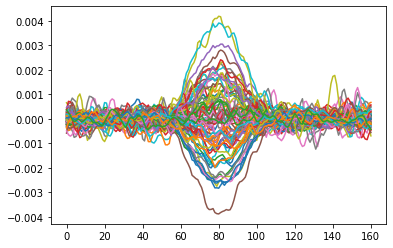

In [244]:

for i in ccf_list:
    plt.plot(i)

In [128]:
#Period
period = 9.978570

# time of conjuction
T_c = 2456979.9326-2400000-np.min(df_sorted["BJD"])
T_c

-274.6611500000581

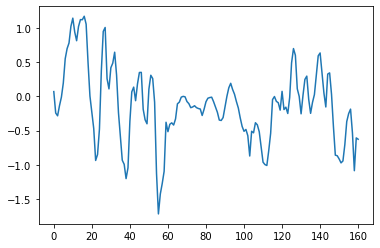

In [142]:
plt.plot(df_sorted["CCF"][0])

Text(0, 0.5, 'RV (m/s)')

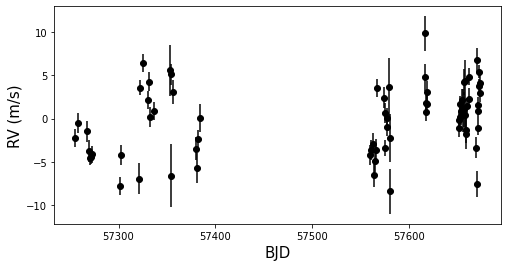

In [129]:
fig, ax = plt.subplots(1,1, figsize=(8, 4))

x = df_sorted["BJD"]
y = df_sorted["vrad"]-np.mean(df_sorted["vrad"])
yerr = df_sorted["svrad"]

#ax[0].scatter(txt_file["BJD_UTC"]-2400000, txt_file["vrad"]-np.mean(txt_file["vrad"]))
ax.errorbar(x, y, yerr = yerr, fmt = 'o', color='k')
ax.set_xlabel("BJD", size=15)
ax.set_ylabel("RV (m/s)",size=15)

In [130]:
#number of columns
ccf_indexes = [15, 31, 64 , 72 ,76 , 80 , 84,  88 ,92,  96, 145]
#[15, 31, 64  ,68 , 72 ,76 , 80 , 84,  88 ,92,  96, 120, 145] #another optimization point

n_cols =len(ccf_indexes)+4
n_rows = len(ccf_list_np) # len(ccf_list_np)<---- unsmoothed
x = np.zeros((n_rows, n_cols))

# delete this line later
period = 9.978570

x[:,0] =  1
x[:,1] =  time_np # remove for L-S
x[:,2] =  time_np**2 # remove for L-S
x[:,3] =  np.sin(2*np.pi*(time_np-T_c)/period+np.pi) #try a whole bunch periods
#x[:,4] =  np.cos(2*np.pi*(time_np-T_c)/period)


# add variables for every position in x per ccf. Each variable has all observations for that position in x
# if choosing random points within x evenly sampled
#for i in np.arange(0, 11):
#    X[:,i+5] = ccf_list_np_transpose[16*i] #(for all observations)

for i in np.arange(0, len(ccf_indexes)):
    x[:,i+4] = ccf_list_np_transpose[ccf_indexes[i]] #(for all observations)

#Using the smoothed over CCFs
#for i in np.arange(0, len(master_binned_center_CCFs_transpose)):
#    X[:,i+5] = master_binned_center_CCFs_transpose[i]

y = rv_np

In [131]:
alpha = x.transpose().dot(x)
beta = x.transpose().dot(y)

# and finally we can write a_coeff = alpha^-1 * beta
inv_alpha = np.linalg.inv(alpha)
a_coeff = inv_alpha.dot(beta)

In [132]:
a_coeff

array([ 9.19630397e-01, -1.63942140e-02,  3.75661020e-05,  1.91582731e+00,
        2.42563372e-01, -9.57643938e-01,  1.34975856e+00, -2.34077096e+00,
       -6.13256244e+00, -6.47810906e-01,  4.57276754e-01,  5.45131599e+00,
       -2.68905442e+00,  2.13081067e+00, -4.32452679e-01])

In [133]:
CCF_matrix = np.zeros((n_rows, len(ccf_indexes)))
print(len(ccf_indexes))
for i in np.arange(0, len(ccf_indexes)):
    CCF_matrix[:,i] = ccf_list_np_transpose[ccf_indexes[i]] #(for all observations)

11


In [134]:
def log_likelihood(theta, t, x, y, e):
    amplitude, jitterpar, D, trend, quadr, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10= theta
    #amplitude, jitterpar, D, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10= theta
    model = amplitude * np.sin(2*np.pi*(t-T_c)/period + np.pi) + D + trend*t+ quadr*t**2 + a0*x[:,0] + a1*x[:,1] + a2*x[:,2] + a3*x[:,3] + a4*x[:,4] +a5*x[:,5] + a6*x[:,6] + a7*x[:,7] + a8*x[:,8]+ a9*x[:,9] + a10*x[:,10] #+ a11*x[:,11] +a12*x[:,12]
    #model = amplitude * np.sin(2*np.pi*(t-T_c)/period + np.pi) + D  + a0*x[:,0] + a1*x[:,1] + a2*x[:,2] + a3*x[:,3] + a4*x[:,4] +a5*x[:,5] + a6*x[:,6] + a7*x[:,7] + a8*x[:,8]+ a9*x[:,9] + a10*x[:,10] #+ a11*x[:,11] +a12*x[:,12]
    sigma2 = e**2 + jitterpar**2
    loglikelihood =  -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))
    return loglikelihood

In [135]:
solnx = np.array([1.89571103e+00,  2.20048546e+00, -7.21531857e-09])
solnx = np.append(solnx, a_coeff[1])
solnx = np.append(solnx, a_coeff[2])
num = 0
for i in np.arange(0, len(a_coeff[4:])): # change back to 4 if you include linear and quadratic
    solnx = np.append(solnx, a_coeff[4:][i])
    num +=1



In [136]:
solnx

array([ 1.89571103e+00,  2.20048546e+00, -7.21531857e-09, -1.63942140e-02,
        3.75661020e-05,  2.42563372e-01, -9.57643938e-01,  1.34975856e+00,
       -2.34077096e+00, -6.13256244e+00, -6.47810906e-01,  4.57276754e-01,
        5.45131599e+00, -2.68905442e+00,  2.13081067e+00, -4.32452679e-01])

In [137]:
len(solnx)

16

In [138]:
len(ccf_indexes)

11

In [139]:
def log_prior(theta):
    amplitude, jitterpar, D, trend, quadr, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10 = theta
    #amplitude, jitterpar, D, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10 = theta
    if -5 < amplitude < 10.0 and 0.01 < jitterpar < 4.0:
        return 0.0
    return -np.inf

In [140]:
def log_probability(theta, t, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, t, x, y, yerr)

In [141]:
pos = solnx + 1e-4 * np.random.randn(60, len(solnx)) #ball size array for each parameter
#pos[:,3] = pos[:,3]*2.6897657941202826e+14
#pos[:,13] = pos[:,13]*2.6897657941202826e+14
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(time_np, CCF_matrix, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [04:06<00:00, 20.28it/s]


State([[ 1.68740689e+00  2.01613787e+00  1.57606107e+00 -3.45234513e-02
   8.21114973e-05 -2.31403676e-01 -1.47989109e+00  4.22976310e+00
   1.46138338e-01 -8.11386578e+00 -1.77715676e+00  1.10590329e+00
   3.56564093e+00 -2.75846604e+00  1.65174041e+00 -9.25132175e-01]
 [ 2.49140843e+00  1.86414050e+00 -1.44941049e-01  4.40018543e-03
  -9.15036339e-06 -5.21805896e-01 -1.66772634e+00  2.04640278e+00
   8.19967106e-01 -8.27926456e+00 -1.14805031e-02 -1.22137624e+00
   4.06933254e+00 -5.24636524e-01  7.43353734e-01 -5.12108952e-01]
 [ 1.81474802e+00  1.92024230e+00 -3.73380315e-01  4.85440135e-03
  -9.67349730e-06  2.20502183e-01 -9.74605938e-01  2.65448431e+00
  -2.80463581e+00 -7.86731440e+00  4.90077983e-01  1.26512452e+00
   3.06571072e+00 -9.47140636e-01  1.73623730e+00 -5.16602850e-01]
 [ 1.54042157e+00  2.24378842e+00 -5.54211160e-01 -4.69488485e-03
   2.09705492e-05  4.05744690e-01 -6.69276775e-01 -1.84708083e+00
  -6.10863662e-01 -7.46989223e+00  3.19421512e+00 -6.56048012e-01
 

Text(0.5, 0, 'step number')

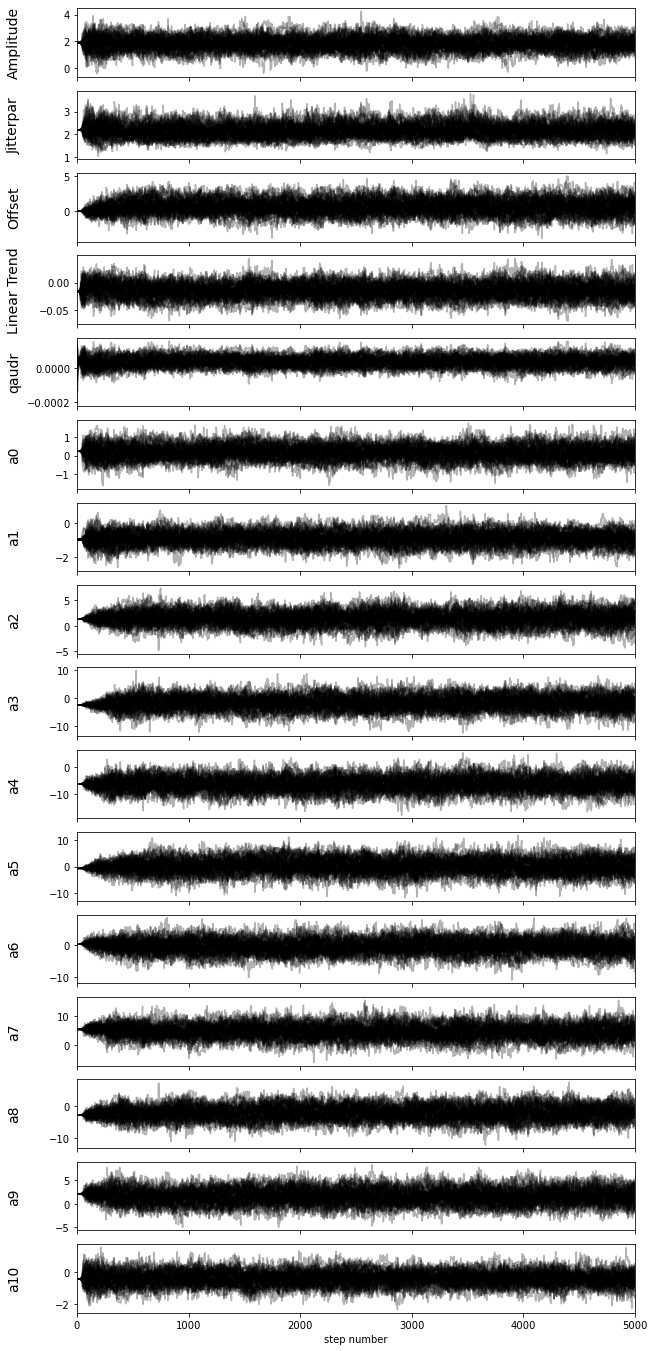

In [143]:
fig, axes = plt.subplots(len(solnx), figsize=(10, 1.5*len(solnx)), sharex=True)
samples = sampler.get_chain()
labels = ["Amplitude", "Jitterpar","Offset", "Linear Trend", "qaudr","a0", "a1", "a2", "a3",
          "a4", "a5", "a6", "a7", "a8", "a9", "a10", "a11", "a12"]
#labels = ["Amplitude", "Jitterpar","Offset", "a0", "a1", "a2", "a3",
#          "a4", "a5", "a6", "a7", "a8", "a9", "a10", "a11", "a12"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], size=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [168]:
# discard first 100 burn-in samples
flat_samples = sampler.get_chain(discard=2500, thin=15, flat=True)
print(flat_samples.shape)

(9960, 16)


In [169]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

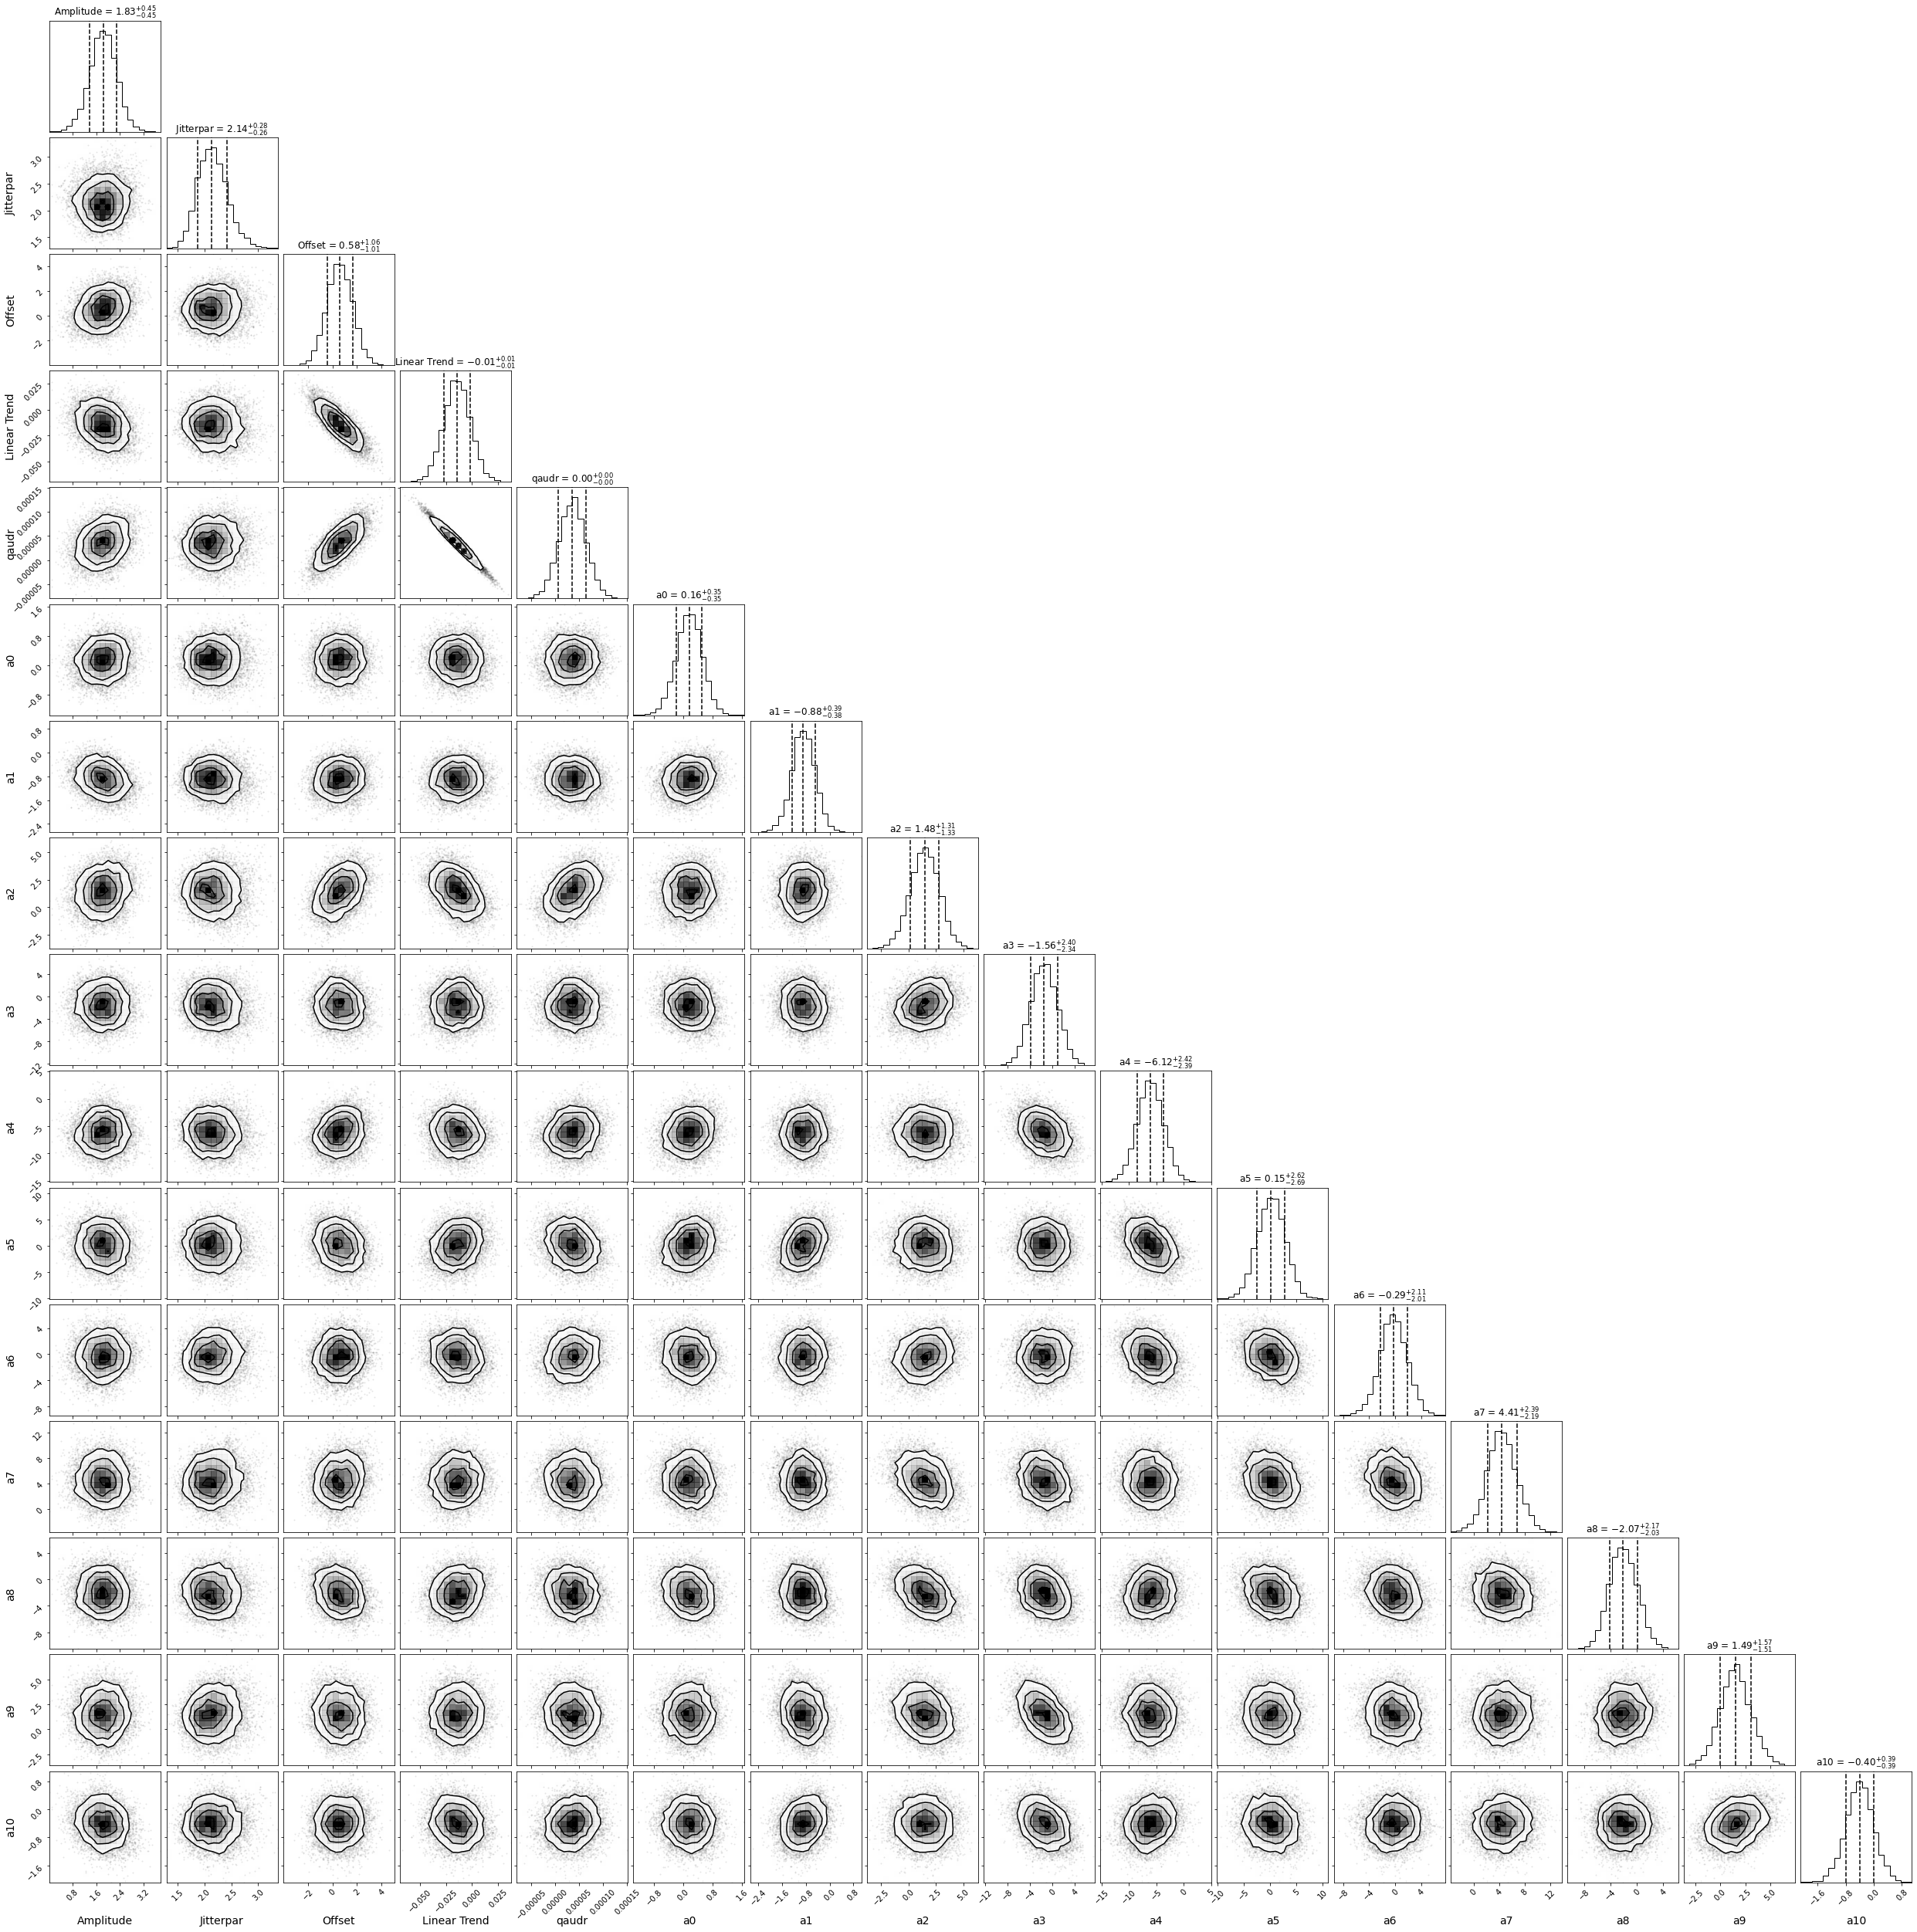

In [174]:
import corner
fig = corner.corner(
    flat_samples,
    labels=labels,
    quantiles=[0.159, 0.5, 0.841],
    show_titles=True,
    label_kwargs=dict(fontsize=14))
#fig.ylabels(size=16)
#, truths=[amplitude_true, jitterpar_true, D_true]
#);

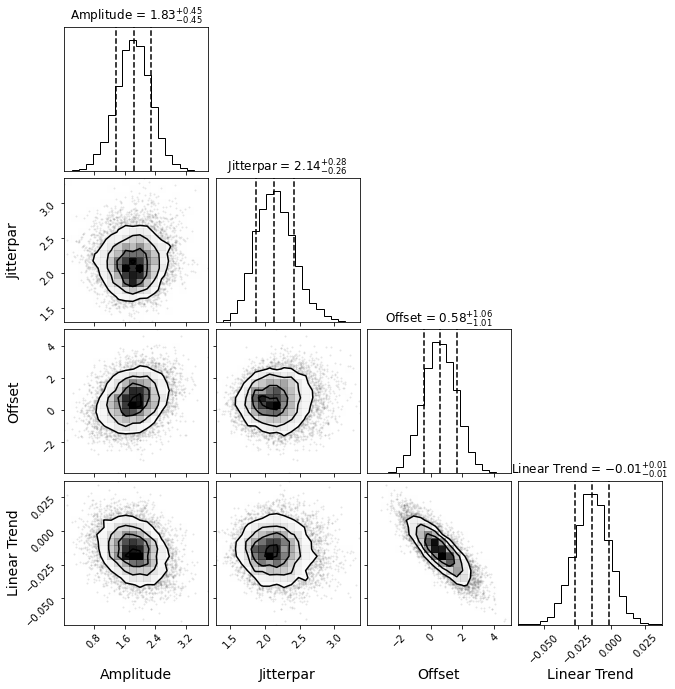

In [176]:
fig = corner.corner(
    flat_samples[:,0:4],
    labels=labels[0:4],
    quantiles=[0.159, 0.5, 0.841],
    show_titles=True,
    label_kwargs=dict(fontsize=14))

In [177]:
amp_mcmc = np.percentile(flat_samples[:, 0], [50])[0]
jitterpar_mcmc = np.percentile(flat_samples[:, 1], [50])[0]
D_mcmc = np.percentile(flat_samples[:, 2], [50])[0]
trend_mcmc = np.percentile(flat_samples[:, 3], [50])[0]
quadr_mcmc = np.percentile(flat_samples[:, 4], [50])[0]

A_mcmc_coeffs = np.zeros(11)
for i in np.arange(5, 16):
    A_mcmc_coeffs[i-5]=  np.percentile(flat_samples[:, i], [50])[0]

In [178]:
sigma_after_amp = amp_mcmc/0.45
sigma_after_amp

4.065364341893006

In [179]:
print(amp_mcmc)
print(jitterpar_mcmc)
print(D_mcmc)
print(trend_mcmc)
print(quadr_mcmc)
print(A_mcmc_coeffs)


1.8294139538518528
2.1393568372243386
0.58068784670632
-0.014633330369647478
3.564969855505696e-05
[ 0.15633862 -0.88263809  1.48416857 -1.55827007 -6.11605496  0.1495839
 -0.28574196  4.41105247 -2.0720461   1.49223757 -0.39815063]


No handles with labels found to put in legend.


1.8294139538518528
0.58068784670632
-0.014633330369647478
[ 0.15633862 -0.88263809  1.48416857 -1.55827007 -6.11605496  0.1495839
 -0.28574196  4.41105247 -2.0720461   1.49223757 -0.39815063]


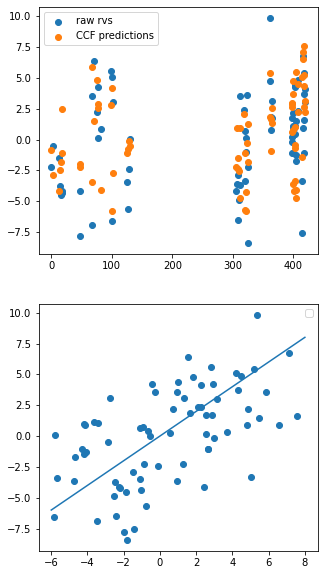

In [180]:
fig, ax = plt.subplots(2,1, figsize=(5, 10))

y_preds = amp_mcmc * np.sin(2*np.pi*(time_np)/period + np.pi) + D_mcmc +trend_mcmc*(time_np)+quadr_mcmc*(time_np)**2 +CCF_matrix.dot(A_mcmc_coeffs)

ax[0].scatter(time_np, y, label="raw rvs")
ax[0].scatter(time_np, y_preds, label="CCF predictions")
ax[0].legend()

ax[1].scatter(y_preds, y)
ax[1].plot([-6,8],[-6,8])
ax[1].legend()
print(amp_mcmc)
print(D_mcmc)
print(trend_mcmc)
print(A_mcmc_coeffs)

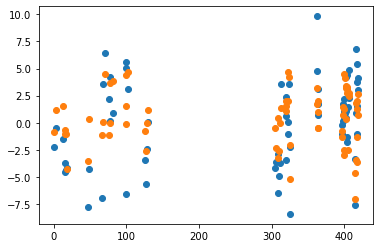

In [198]:
# phasefold data

planet = amp_mcmc * np.sin(2*np.pi*(time_np-T_c)/period + np.pi) + D_mcmc
activity_model = trend_mcmc*(time_np)+quadr_mcmc*(time_np)**2 + CCF_matrix.dot(A_mcmc_coeffs)
corrected_RVs = y-activity_model
uncorrected_RVs = y

plt.scatter(time_np, uncorrected_RVs)
plt.scatter(time_np, corrected_RVs)

In [199]:
weighted_avg_uncertainty

inf

In [200]:
i = 5
index= np.where(np.abs(phase-i+0.5) < 0.5)
total_err = np.array(np.sqrt(yerr**2+jitterpar_mcmc**2))
binned_uncertainties
#2.357642

[inf,
 0.9894655048987642,
 1.3164435777322452,
 0.902647032422753,
 1.147962951088993,
 1.0861616277611947,
 0.8567599446052855,
 0.876376034129608,
 0.749073922444455,
 0.9273026435392059,
 0.8545340651665384,
 inf]

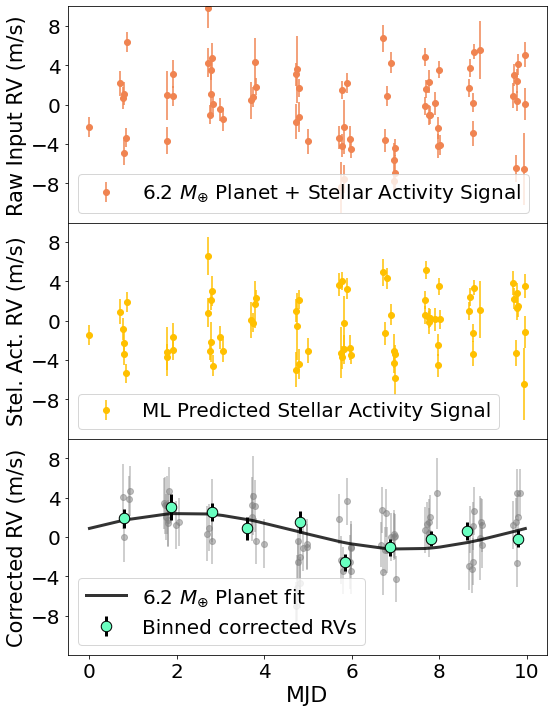

In [240]:
# Black version
#plt.rcParams["font.family"] = "Computer Modern Typewriter"
sd = 0.05
#y = list(planet_signal(x))
#y = y + np.random.normal(0, sd, len(x))

fig, ax = plt.subplots(3, 1, figsize=(8, 10), sharex=True)


ax[0].errorbar(time_np%period, uncorrected_RVs, yerr = yerr, fmt = 'o', color='#f08451', label="6.2 $M_{\oplus}$ Planet + Stellar Activity Signal", zorder=1)
#ax[0].plot(x_range, amplitude_true*np.sin(B_true*x_range+C_true)+np.random.normal(0, sd, len(x_range)),'.', color='#69ffc0',linewidth=2, label="Earth-mass Planet Signal")

#ax[0].plot(x_range, amplitude_true*np.sin(B_true*x_range+C_true), '#69ffc0',linewidth=2, label="Earth-mass Planet Signal")

ax[1].errorbar(time_np%period, activity_model, yerr = yerr, fmt = 'o', color='#FFC000', label="ML Predicted Stellar Activity Signal",zorder=1)
#ax[2].errorbar(time_np%period, uncorrected_RVs-activity_model, yerr = yerr, fmt = 'o',  color='#69ffc0',linewidth=2, label="2 $M_{\oplus}$ Planet Signal",zorder=1)
ax[2].errorbar(phase, y-activity_model, yerr = total_err, fmt = 'o', color='grey', alpha=0.5, zorder=1)
ax[2].errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, elinewidth=3,ecolor='k',
            color='#69ffc0',linestyle='none',marker='.', markersize=21, markeredgewidth=1, 
            markeredgecolor='k', label="Binned corrected RVs")
#ax[2].set_ylim(-4, 6.5)


ax[0].set_ylabel('Raw Input RV (m/s)', size=21);
ax[1].set_ylabel('Stel. Act. RV (m/s)', size=21);
ax[2].set_ylabel('Corrected RV (m/s)', size=21);
ax[2].set_xlabel('MJD', size=22);
ax[2].plot(df_rv_sorted["phases"], df_rv_sorted["planet"], color='k',label ="6.2 $M_{\oplus}$ Planet fit", linewidth= 3, zorder=2, alpha=0.8)
#ax[2].legend(prop={'size': 16})

x_range = np.linspace(np.min(time_np), np.max(time_np), 800)
for i in [0, 1, 2]:
    #ax[i].plot(x_range%period, amp_mcmc * np.sin(2*np.pi*(x_range-T_c)/period + np.pi) + D_mcmc, color='k')
    #ax[i].set_xlim(0, 800)
    ax[i].legend(prop={'size': 20}, loc="lower left")
    ax[i].set_ylim(-12, 10)
    ax[i].tick_params(axis='x', labelsize= 20) #to Set Matplotlib Tick Labels Font Size
    ax[i].tick_params(axis='y', labelsize= 20)
    _

plt.tight_layout()
fig.subplots_adjust(hspace=0)

/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


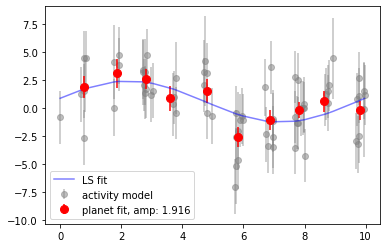

In [184]:
# phasefold data
total_err = np.array(np.sqrt(yerr**2+jitterpar_mcmc**2))
planet = amp_mcmc * np.sin(2*np.pi*(time_np-T_c)/period + np.pi) + D_mcmc
activity_model = trend_mcmc*(time_np)+quadr_mcmc*(time_np)**2 + CCF_matrix.dot(A_mcmc_coeffs)
corrected_RVs = y-activity_model
uncorrected_RVs = y

phase = (time_np)%period 
binned_RVs = [] 
binned_phases = []
binned_uncertainties = []
binned_uncorr_RVs = []

for i in range(0, 12):
    index= np.where(np.abs(phase-i+0.5) < 0.5)
    weighted_avg_rv = np.sum(corrected_RVs[index]/total_err[index]**2)/np.sum(1/total_err[index]**2)
    weighted_avg_uncorr_rv = np.sum(uncorrected_RVs[index]/total_err[index]**2)/np.sum(1/total_err[index]**2)
    weighted_avg_phases = np.sum(phase[index]/total_err[index]**2)/np.sum(1/total_err[index]**2)
    weighted_avg_uncertainty= np.sqrt(1.0/np.sum(1.0/total_err[index]**2))
    binned_RVs.append(weighted_avg_rv)
    binned_uncorr_RVs.append(weighted_avg_uncorr_rv)
    binned_phases.append(weighted_avg_phases)
    binned_uncertainties.append(weighted_avg_uncertainty)

df_rv= pd.DataFrame(list(zip(phase,planet)), 
               columns =['phases',"planet",]) 
df_rv_sorted = df_rv.sort_values(by=['phases'])
plt.errorbar(phase, y-activity_model, yerr = total_err, fmt = 'o', color='grey', alpha=0.5, label="activity model", zorder=1)
#plt.errorbar(binned_phases, binned_uncorr_RVs, yerr = binned_uncertainties, fmt = 'o', color='b', alpha=1, markersize = 8, label="planet fit", zorder=1)
plt.errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, fmt = 'o', color='r', alpha=1, markersize = 8, label="planet fit, amp: "+str(round(a_coeff[3],3)), zorder=2)
plt.plot(df_rv_sorted["phases"], df_rv_sorted["planet"], color='b',zorder=2, alpha=0.5, label="LS fit")
plt.legend()


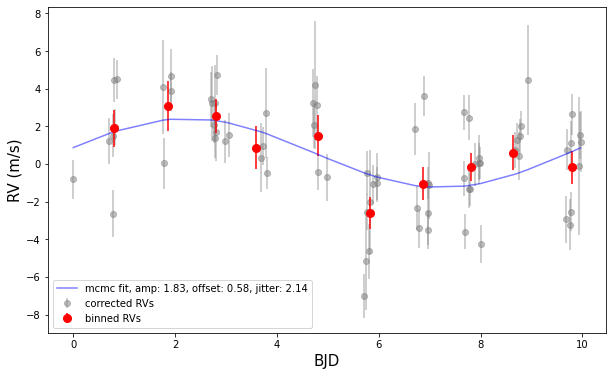

In [185]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))


df_rv_mcmc= pd.DataFrame(list(zip(phase,planet)), 
               columns =['phases',"planet",]) 
df_rv_mcmc_sorted = df_rv_mcmc.sort_values(by=['phases'])


ax.errorbar(phase, corrected_RVs, yerr = yerr, fmt = 'o', color='grey', alpha=0.5, label="corrected RVs", zorder=1)
ax.errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, fmt = 'o', color='r', alpha=1, markersize = 8, label="binned RVs", zorder=2)
ax.plot(df_rv_mcmc_sorted["phases"], df_rv_mcmc_sorted["planet"], color='b',zorder=2, alpha=0.5, 
        label="mcmc fit, amp: "+str(round(amp_mcmc,2))+", offset: "+str(round(D_mcmc,2))+", jitter: "+str(round(jitterpar_mcmc, 2)))
ax.set_xlabel("BJD", size=15)
ax.set_ylabel("RV (m/s)",size=15)
ax.legend(loc="lower left")

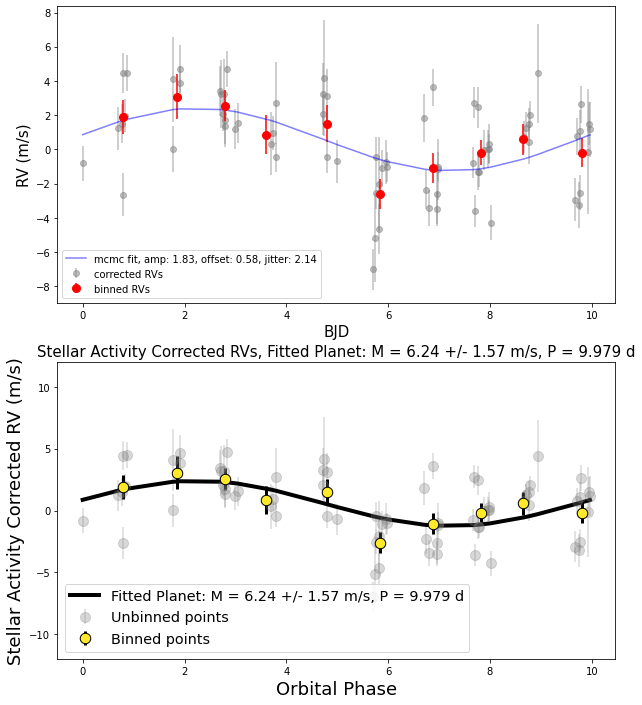

In [190]:
fig, ax = plt.subplots(2,1, figsize=(10, 12))

ax[0].errorbar(phase, corrected_RVs, yerr = yerr, fmt = 'o', color='grey', alpha=0.5, label="corrected RVs", zorder=1)
ax[0].errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, fmt = 'o', color='r', alpha=1, markersize = 8, label="binned RVs", zorder=2)
ax[0].plot(df_rv_mcmc_sorted["phases"], df_rv_mcmc_sorted["planet"], color='b',zorder=2, alpha=0.5, 
        label="mcmc fit, amp: "+str(round(amp_mcmc,2))+", offset: "+str(round(D_mcmc,2))+", jitter: "+str(round(jitterpar_mcmc, 2)))
ax[0].set_xlabel("BJD", size=15)
ax[0].set_ylabel("RV (m/s)",size=15)
ax[0].legend(loc="lower left")



ax[1].errorbar(phase, y-activity_model, yerr = yerr, ecolor= 'grey', 
            color='grey',linestyle='none',marker='.', markersize=20, alpha=0.3, label="Unbinned points")
ax[1].plot(df_rv_sorted["phases"], df_rv_sorted["planet"],
        'k',linewidth=4, 
        label='Fitted Planet: M = '+str(round(mass, 2))+" +/- "+str(round(mass_sd, 2))+" m/s, P = "+
            str(round(period, 3))+" d")
#ax.plot(x_range, amplitude_true*np.sin(B_true*x_range+C_true), 'b',linewidth=6, label="Injected Planet Signal")
ax[1].errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, elinewidth=3,ecolor='k',
            color='#FFEA29',linestyle='none',marker='.', markersize=21, markeredgewidth=1, 
            markeredgecolor='k', label="Binned points")
ax[1].set_ylim(-12,12)
#ax.set_xlim(-period_mcmc/2,period_mcmc/2)
ax[1].set_xlabel('Orbital Phase', size=18)
ax[1].set_ylabel('Stellar Activity Corrected RV (m/s)', size=18)

ax[1].set_title('Stellar Activity Corrected RVs, Fitted Planet: M = '+str(round(mass, 2))+" +/- "+str(round(mass_sd, 2))+" m/s, P = "+
            str(round(period, 3))+" d", size=15)
#             str(period), size=15) #, m = 0.5Me
ax[1].legend(loc='lower left', fontsize='x-large')

In [191]:
np.percentile(mass, [16, 50, 84])

array([6.24159409, 6.24159409, 6.24159409])

1.8294139538518528
0.46108894765714264
6.241594091061451
1.5731431615523912


<IPython.core.display.Math object>

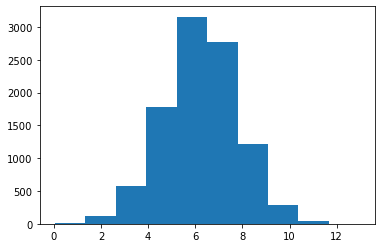

In [188]:
# error prop without error prop (monte carlo)

#sin_prop = np.random.normal(a_coeff[3], sd_sin, 10000)
#cos_prop = np.random.normal(a_coeff[4], sd_cos, 10000)

amplitudes =flat_samples[:, 0] #np.sqrt(sin_prop**2 + cos_prop**2)

print(np.median(amplitudes))
print(np.std(amplitudes))

Mstar = 1.02 *1.989*10**30 #1.1 or 1.2 solar masses
Mstar_uncertainty = 0.12 *1.989*10**30
eccentricity =0.0
K = amplitudes

mps1 = (Mstar**2 * period * 24.0 * 3600.0 * (K)**3 * (1 - eccentricity**2)**(3.0/2.0) / (2.0 * np.pi * 6.67e-11))**(1.0/3.0) / (5.974e24)

plt.hist(mps1)

print(np.median(mps1))
print(np.std(mps1))


mass = np.median(mps1)
mass_sd = np.std(mps1)

for i in range(0,1):
    mcmc = np.percentile(mps1, [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], "Mass")
    display(Math(txt))

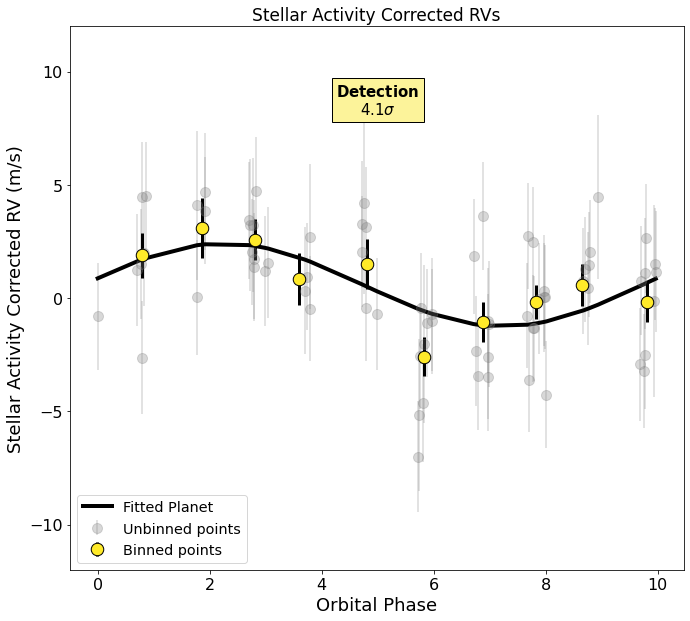

In [192]:
fig, ax = plt.subplots(1,1,figsize=(11, 10))

# corrected RVs
ax.errorbar(phase, y-activity_model, yerr = total_err, ecolor= 'grey', 
            color='grey',linestyle='none',marker='.', markersize=20, alpha=0.3, label="Unbinned points")

ax.plot(df_rv_sorted["phases"], df_rv_sorted["planet"],
        'k',linewidth=4, label='Fitted Planet')#: M = '+str(round(mass, 2))+" +/- "+str(round(mass_sd, 2))+" m/s, P = "+
#            str(round(period, 3))+" d")
#ax.plot(x_range, amplitude_true*np.sin(B_true*x_range+C_true), 'b',linewidth=6, label="Injected Planet Signal")
ax.errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, elinewidth=3,ecolor='k',
            color='#FFEA29',linestyle='none',marker='.', markersize=25, markeredgewidth=1, 
            markeredgecolor='k', label="Binned points")
ax.set_ylim(-12,12)
#ax.set_xlim(-period_mcmc/2,period_mcmc/2)
ax.set_xlabel('Orbital Phase', size=18)
ax.set_ylabel('Stellar Activity Corrected RV (m/s)', size=18)

ax.set_title('Stellar Activity Corrected RVs'
             #, Fitted Planet: M = '+str(round(mass, 2))+" +/- "+str(round(mass_sd, 2))+" Mearth, P = "+str(round(period, 3))+" d"
             , size=17)
#             str(period), size=15) #, m = 0.5Me
ax.legend(loc='lower left', fontsize='x-large')
textstr = '\n'.join((
        r'$\mathbf{Detection}$',
        r'%.1f$\sigma$' % (round(sigma_after_amp,1), )))
ax.text(5, 9.5, textstr, size=15,
            ha="center", va="top", color= 'k',
            bbox=dict(facecolor='#fcf39a',edgecolor='k',boxstyle="square",
                      #ec=(1., 0.5, 0.5),
                      #fc=(1., 0.8, 0.8),
                      ))


ax.tick_params(axis='x', labelsize= 16) #to Set Matplotlib Tick Labels Font Size
ax.tick_params(axis='y', labelsize= 16)

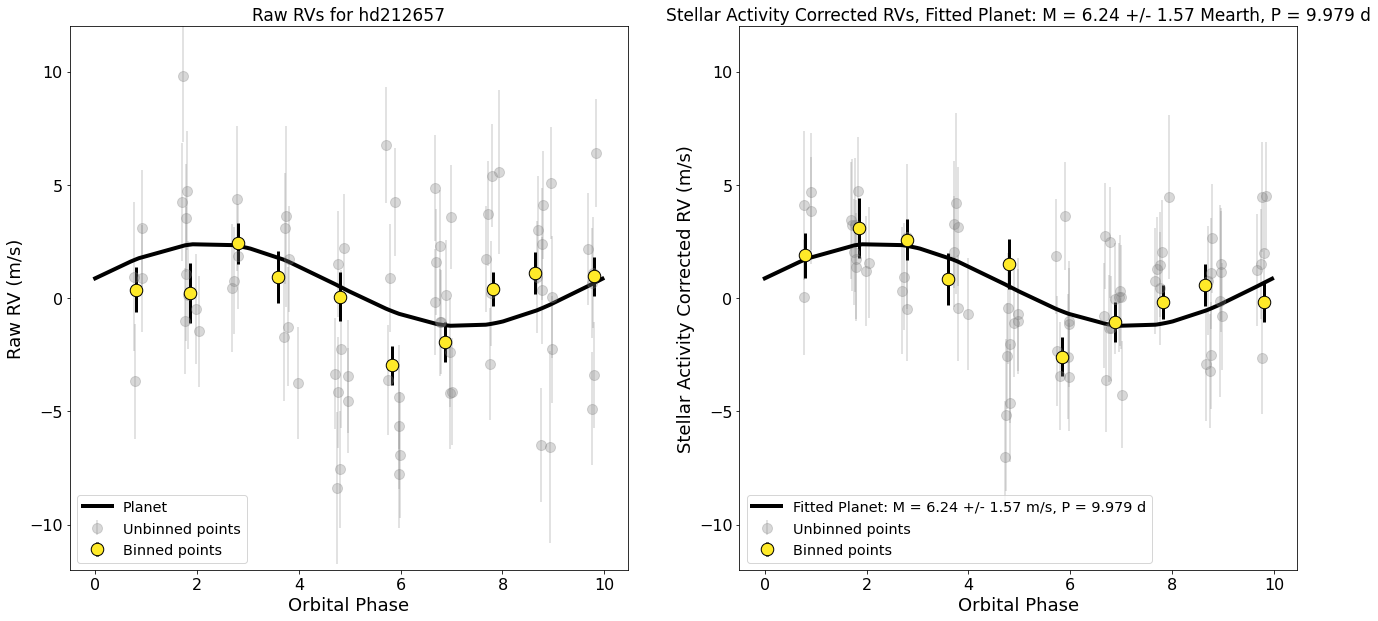

In [193]:
fig, ax = plt.subplots(1,2,figsize=(22, 10))

phase = (time_np-1)%period

# UNcorrected RVs
ax[0].errorbar(phase, y, yerr = total_err, ecolor= 'grey', 
            color='grey',linestyle='none',marker='.', markersize=20, alpha=0.3, label="Unbinned points")

ax[0].plot(df_rv_sorted["phases"], df_rv_sorted["planet"],
        'k',linewidth=4, 
        label="Planet")
#ax.plot(x_range, amplitude_true*np.sin(B_true*x_range+C_true), 'b',linewidth=6, label="Injected Planet Signal")
ax[0].errorbar(binned_phases, binned_uncorr_RVs, yerr = binned_uncertainties, elinewidth=3,ecolor='k',
            color='#FFEA29',linestyle='none',marker='.', markersize=25, markeredgewidth=1, 
            markeredgecolor='k', label="Binned points")
ax[0].set_ylim(-12,12)
#ax.set_xlim(-period_mcmc/2,period_mcmc/2)
ax[0].set_xlabel('Orbital Phase', size=18)
ax[0].set_ylabel('Raw RV (m/s)', size=18)

ax[0].set_title('Raw RVs for hd212657', size=17)
#             str(period), size=15) #, m = 0.5Me
ax[0].legend(loc='lower left', fontsize='x-large')



# corrected RVs
ax[1].errorbar(phase, y-activity_model, yerr = total_err, ecolor= 'grey', 
            color='grey',linestyle='none',marker='.', markersize=20, alpha=0.3, label="Unbinned points")

ax[1].plot(df_rv_sorted["phases"], df_rv_sorted["planet"],
        'k',linewidth=4, 
        label='Fitted Planet: M = '+str(round(mass, 2))+" +/- "+str(round(mass_sd, 2))+" m/s, P = "+
            str(round(period, 3))+" d")
#ax.plot(x_range, amplitude_true*np.sin(B_true*x_range+C_true), 'b',linewidth=6, label="Injected Planet Signal")
ax[1].errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, elinewidth=3,ecolor='k',
            color='#FFEA29',linestyle='none',marker='.', markersize=25, markeredgewidth=1, 
            markeredgecolor='k', label="Binned points")
ax[1].set_ylim(-12,12)
#ax.set_xlim(-period_mcmc/2,period_mcmc/2)
ax[1].set_xlabel('Orbital Phase', size=18)
ax[1].set_ylabel('Stellar Activity Corrected RV (m/s)', size=18)

ax[1].set_title('Stellar Activity Corrected RVs, Fitted Planet: M = '+str(round(mass, 2))+" +/- "+str(round(mass_sd, 2))+" Mearth, P = "+
            str(round(period, 3))+" d", size=17)
#             str(period), size=15) #, m = 0.5Me
ax[1].legend(loc='lower left', fontsize='x-large')


for index_1 in [0,1]:
    ax[index_1].tick_params(axis='x', labelsize= 16) #to Set Matplotlib Tick Labels Font Size
    ax[index_1].tick_params(axis='y', labelsize= 16)

## fit the uncorrected RVs with mcmc (1/4/2021)

In [486]:
#number of columns
#ccf_indexes = [15, 31, 64 , 72 ,76 , 80 , 84,  88 ,92,  96, 145]
#[15, 31, 64  ,68 , 72 ,76 , 80 , 84,  88 ,92,  96, 120, 145] #another optimization point

n_cols = 2
n_rows = len(ccf_list_np) # len(ccf_list_np)<---- unsmoothed
x = np.zeros((n_rows, n_cols))

# delete this line later
period = 9.978570

x[:,0] =  1
x[:,1] =  time_np # remove for L-S
#x[:,2] =  time_np**2 # remove for L-S
#x[:,3] =  np.sin(2*np.pi*(time_np-T_c)/period+np.pi) #try a whole bunch periods
#x[:,4] =  np.cos(2*np.pi*(time_np-T_c)/period)


# add variables for every position in x per ccf. Each variable has all observations for that position in x
# if choosing random points within x evenly sampled
#for i in np.arange(0, 11):
#    X[:,i+5] = ccf_list_np_transpose[16*i] #(for all observations)

#for i in np.arange(0, len(ccf_indexes)):
#    x[:,i+4] = ccf_list_np_transpose[ccf_indexes[i]] #(for all observations)

#Using the smoothed over CCFs
#for i in np.arange(0, len(master_binned_center_CCFs_transpose)):
#    X[:,i+5] = master_binned_center_CCFs_transpose[i]

y = rv_np

In [487]:
alpha = x.transpose().dot(x)
beta = x.transpose().dot(y)

# and finally we can write a_coeff = alpha^-1 * beta
inv_alpha = np.linalg.inv(alpha)
a_coeff = inv_alpha.dot(beta)

In [488]:
def log_likelihood(theta, t, x, y, e):
    amplitude, jitterpar, D= theta
    model = amplitude * np.sin(2*np.pi*(t-T_c)/period + np.pi) + D
    sigma2 = e**2 + jitterpar**2
    loglikelihood =  -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))
    return loglikelihood

In [489]:
def log_likelihood(theta, t, x, y, e):
    amplitude, jitterpar, D = theta
    model = amplitude * np.sin(2*np.pi*(t-T_c)/period + np.pi) + D
    sigma2 = e**2 + jitterpar**2
    loglikelihood =  -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))
    return loglikelihood

In [490]:
solnx = np.array([1.89571103e+00,  3.50048546e+00, -7.21531857e-09])
#solnx = np.append(solnx, a_coeff[1])
#solnx = np.append(solnx, a_coeff[2])
num = 0
#for i in np.arange(0, len(a_coeff[4:])):
#    solnx = np.append(solnx, a_coeff[4:][i])
#    num +=1

In [491]:
def log_prior(theta):
    amplitude, jitterpar, D = theta
    if -5 < amplitude < 10.0 and 0.01 < jitterpar < 7.0:
        return 0.0
    return -np.inf

In [492]:
def log_probability(theta, t, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, t, x, y, yerr)

In [493]:
pos = solnx + 1e-4 * np.random.randn(60, len(solnx)) #ball size array for each parameter
#pos[:,3] = pos[:,3]*2.6897657941202826e+14
#pos[:,13] = pos[:,13]*2.6897657941202826e+14
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(time_np, CCF_matrix, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [03:27<00:00, 24.15it/s]


State([[ 2.21846411  3.39758996  0.70666691]
 [ 0.77325288  3.09627493 -0.36724766]
 [ 0.77572174  2.99995996  0.41819556]
 [ 0.93092022  3.22166835  0.01387194]
 [ 1.7054478   3.49559201  0.05075223]
 [ 1.35602009  3.45751838 -0.38976088]
 [ 1.25128156  2.64133218  0.61294509]
 [ 2.02159407  3.38378533  0.38791464]
 [ 0.92767761  3.14815078 -0.08432666]
 [ 1.45563126  3.28212774  0.35738442]
 [ 2.89755837  4.14602882 -0.00705679]
 [ 0.90694971  3.15456561  0.59718146]
 [ 0.38439255  3.91799309 -0.30525083]
 [ 1.64828019  2.95847695  0.59404911]
 [ 0.79021648  3.5139857   0.68758756]
 [ 1.70331495  2.78786559  1.40819175]
 [ 2.52219712  3.0654946   0.24870044]
 [ 1.37022775  3.26167437  0.58049819]
 [ 2.32432026  4.37030027  0.59109438]
 [ 1.38704586  2.63063854  0.77130774]
 [ 1.16817038  3.4195152   0.23771611]
 [ 0.36952725  3.52370229  0.08473938]
 [ 1.65374564  3.15016748 -0.17102336]
 [ 1.45820654  3.07099992  1.20480389]
 [ 1.43198401  3.77014143  0.21751192]
 [ 1.10147308  3.30

Text(0.5, 0, 'step number')

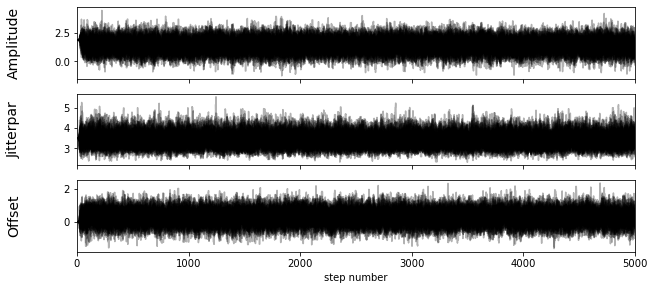

In [408]:
fig, axes = plt.subplots(len(solnx), figsize=(10, 1.5*len(solnx)), sharex=True)
samples = sampler.get_chain()
labels = ["Amplitude", "Jitterpar","Offset"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], size=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [409]:
# discard first 100 burn-in samples
flat_samples = sampler.get_chain(discard=2000, thin=15, flat=True)
print(flat_samples.shape)

(12000, 3)


In [410]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

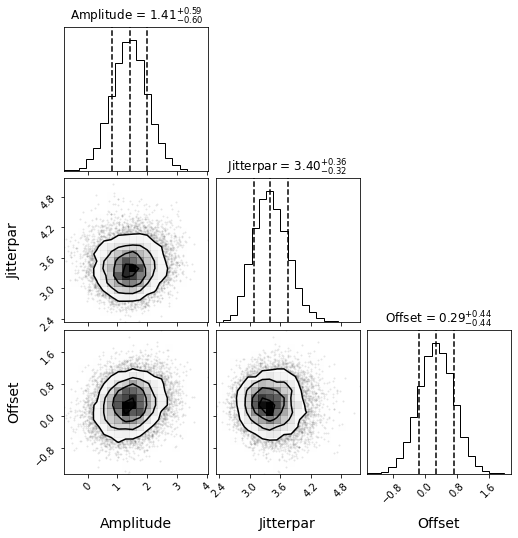

In [411]:
import corner
fig = corner.corner(
    flat_samples,
    labels=labels,
    quantiles=[0.159, 0.5, 0.841],
    show_titles=True,
    label_kwargs=dict(fontsize=14))
#fig.ylabels(size=16)
#, truths=[amplitude_true, jitterpar_true, D_true]
#);

In [418]:
1.41/0.60

2.35

In [412]:
amp_mcmc = np.percentile(flat_samples[:, 0], [50])[0]
jitterpar_mcmc = np.percentile(flat_samples[:, 1], [50])[0]
D_mcmc = np.percentile(flat_samples[:, 2], [50])[0]

In [420]:
sigma_after_amp = amp_mcmc/0.60
sigma_after_amp

2.343175076900738

No handles with labels found to put in legend.


1.4059050461404425
0.28783638790303023
-0.016756985181041933
[ 1534.66264396 -3133.53143307  2718.71222846 -1893.1418101
 -2921.92658453   162.33019332   -65.07595437  2775.83035916
 -2246.61049037  1565.49302362 -1789.1653358 ]


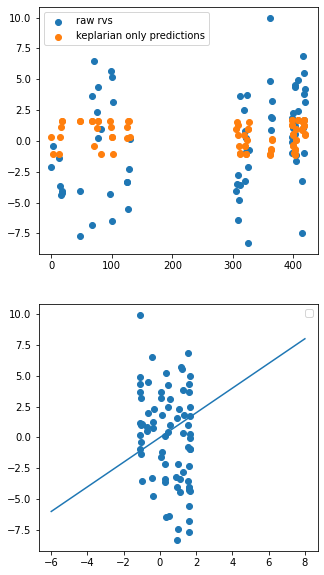

In [414]:
fig, ax = plt.subplots(2,1, figsize=(5, 10))

y_preds = amp_mcmc * np.sin(2*np.pi*(time_np)/period + np.pi) + D_mcmc 

ax[0].scatter(time_np, y, label="raw rvs")
ax[0].scatter(time_np, y_preds, label="keplarian only predictions")
ax[0].legend()

ax[1].scatter(y_preds, y)
ax[1].plot([-6,8],[-6,8])
ax[1].legend()
print(amp_mcmc)
print(D_mcmc)
print(trend_mcmc)
print(A_mcmc_coeffs)

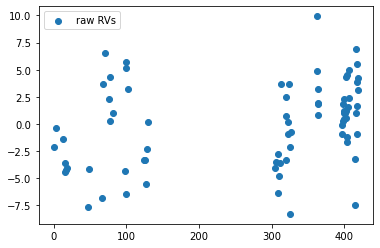

In [415]:
# phasefold data

planet = amp_mcmc * np.sin(2*np.pi*(time_np-T_c)/period + np.pi) + D_mcmc
activity_model = trend_mcmc*(time_np)+quadr_mcmc*(time_np)**2
corrected_RVs = y-activity_model
uncorrected_RVs = y

plt.scatter(time_np, uncorrected_RVs, label="raw RVs")
#plt.scatter(time_np, corrected_RVs, label="detrended")
plt.legend()

/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


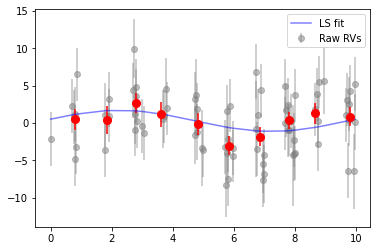

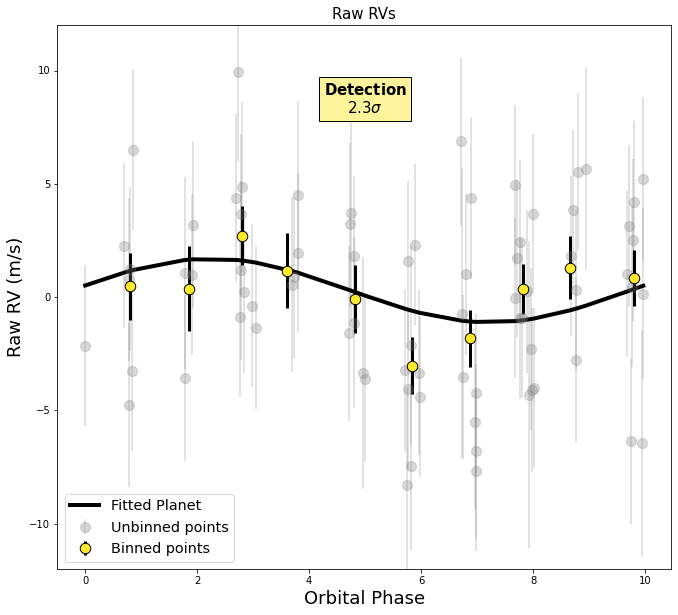

In [443]:
# phasefold data
total_err = np.array(np.sqrt(yerr**2+jitterpar_mcmc**2))
planet = amp_mcmc * np.sin(2*np.pi*(time_np-T_c)/period + np.pi) + D_mcmc
#activity_model = trend_mcmc*(time_np)+quadr_mcmc*(time_np)**2 + CCF_matrix.dot(A_mcmc_coeffs)
#corrected_RVs = y-activity_model
uncorrected_RVs = y

phase = (time_np)%period 
binned_RVs = [] 
binned_phases = []
binned_uncertainties = []
binned_uncorr_RVs = []

for i in range(0, 12):
    index= np.where(np.abs(phase-i+0.5) < 0.5)
    #weighted_avg_rv = np.sum(corrected_RVs[index]/s_rv_np[index]**2)/np.sum(1/s_rv_np[index]**2)
    weighted_avg_uncorr_rv = np.sum(uncorrected_RVs[index]/total_err[index]**2)/np.sum(1/total_err[index]**2)
    weighted_avg_phases = np.sum(phase[index]/total_err[index]**2)/np.sum(1/total_err[index]**2)
    weighted_avg_uncertainty= np.sqrt(1.0/np.sum(1.0/total_err[index]**2))
    #binned_RVs.append(weighted_avg_rv)
    binned_uncorr_RVs.append(weighted_avg_uncorr_rv)
    binned_phases.append(weighted_avg_phases)
    binned_uncertainties.append(weighted_avg_uncertainty)

df_rv= pd.DataFrame(list(zip(phase,planet)), 
               columns =['phases',"planet",]) 
df_rv_sorted = df_rv.sort_values(by=['phases'])
plt.errorbar(phase, y, yerr = total_err, fmt = 'o', color='grey', alpha=0.5, label="Raw RVs", zorder=1)
#plt.errorbar(binned_phases, binned_uncorr_RVs, yerr = binned_uncertainties, fmt = 'o', color='b', alpha=1, markersize = 8, label="planet fit", zorder=1)
plt.errorbar(binned_phases, binned_uncorr_RVs, yerr = binned_uncertainties, fmt = 'o', color='r', alpha=1, markersize = 8, zorder=2)
plt.plot(df_rv_sorted["phases"], df_rv_sorted["planet"], color='b',zorder=2, alpha=0.5, label="LS fit")
plt.legend()

fig, ax = plt.subplots(1,1, figsize=(11, 10))
ax.errorbar(phase, y, yerr = total_err, ecolor= 'grey', 
            color='grey',linestyle='none',marker='.', markersize=20, alpha=0.3, label="Unbinned points")
ax.plot(df_rv_sorted["phases"], df_rv_sorted["planet"],
        'k',linewidth=4, label='Fitted Planet')
#ax.plot(x_range, amplitude_true*np.sin(B_true*x_range+C_true), 'b',linewidth=6, label="Injected Planet Signal")
ax.errorbar(binned_phases, binned_uncorr_RVs, yerr = binned_uncertainties, elinewidth=3,ecolor='k',
            color='#FFEA29',linestyle='none',marker='.', markersize=21, markeredgewidth=1, 
            markeredgecolor='k', label="Binned points")
ax.set_ylim(-12,12)
#ax.set_xlim(-period_mcmc/2,period_mcmc/2)
ax.set_xlabel('Orbital Phase', size=18)
ax.set_ylabel('Raw RV (m/s)', size=18)

ax.set_title('Raw RVs', size=15)
#             str(period), size=15) #, m = 0.5Me
textstr = '\n'.join((
        r'$\mathbf{Detection}$',
        r'%.1f$\sigma$' % (round(sigma_after_amp,1), )))
ax.text(5, 9.5, textstr, size=15,
            ha="center", va="top", color= 'k',
            bbox=dict(facecolor='#fcf39a',edgecolor='k',boxstyle="square",
                      #ec=(1., 0.5, 0.5),
                      #fc=(1., 0.8, 0.8),
                      ))
ax.legend(loc='lower left', fontsize='x-large')
ax.tick_params(axis='x', labelsize= 16) #to Set Matplotlib Tick Labels Font Size
ax.tick_params(axis='y', labelsize= 16)

In [417]:
(np.max(df_rv_sorted["planet"])-np.min(df_rv_sorted["planet"]))/2

1.3822302602649352

## Old code below (12/21/2020)

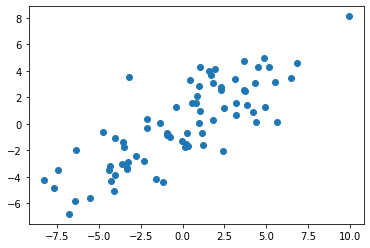

In [14]:
plt.scatter(y, x.dot(a_coeff))

418.9149000000034


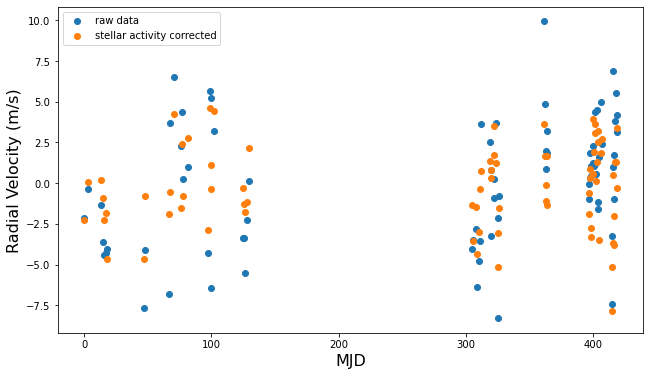

In [16]:
planet = a_coeff[3]*np.sin(2*np.pi*(time_np-T_c)/period+np.pi)
activity_model = x.dot(a_coeff)-planet
corrected_RVs = y-activity_model

fig, ax1 = plt.subplots(1, 1, figsize=(10.5, 6))

plt.scatter(time_np, y, label="raw data")
plt.scatter(time_np, corrected_RVs, label="stellar activity corrected")


plt.legend(loc="upper left")
plt.xlabel("MJD", size=16)
plt.ylabel("Radial Velocity (m/s)", size=16)
print(np.max(time_np))

/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/Zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


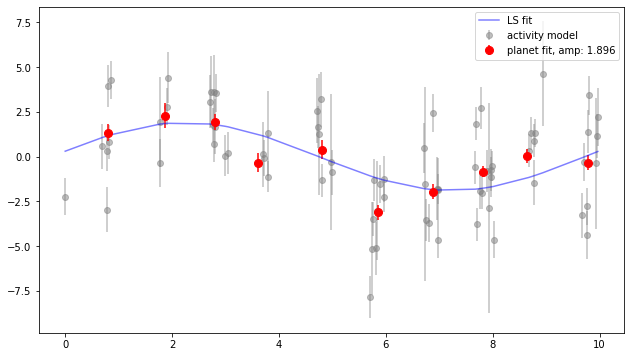

In [18]:
phase = (time_np)%period
df_rv= pd.DataFrame(list(zip(phase,planet)), 
               columns =['phases',"planet",]) 
df_rv_sorted = df_rv.sort_values(by=['phases'])

uncorrected_RVs = y
phase = (time_np)%period
binned_RVs = [] 
binned_phases = []
binned_uncertainties = []
binned_uncorr_RVs = []

for i in range(0, 11):
    index= np.where(np.abs(phase-i+0.5) < 0.5)
    weighted_avg_rv = np.sum(corrected_RVs[index]/rv_error[index]**2)/np.sum(1/rv_error[index]**2)
    weighted_avg_uncorr_rv = np.sum(uncorrected_RVs[index]/rv_error[index]**2)/np.sum(1/rv_error[index]**2)
    weighted_avg_phases = np.sum(phase[index]/rv_error[index]**2)/np.sum(1/rv_error[index]**2)
    weighted_avg_uncertainty= np.sqrt(1.0/np.sum(1.0/rv_error[index]**2))
    binned_RVs.append(weighted_avg_rv)
    binned_uncorr_RVs.append(weighted_avg_uncorr_rv)
    binned_phases.append(weighted_avg_phases)
    binned_uncertainties.append(weighted_avg_uncertainty)

fig, ax1 = plt.subplots(1, 1, figsize=(10.5, 6))


plt.errorbar(phase, y-activity_model, yerr = yerr, fmt = 'o', color='grey', alpha=0.5, label="activity model", zorder=1)
#plt.errorbar(binned_phases, binned_uncorr_RVs, yerr = binned_uncertainties, fmt = 'o', color='b', alpha=1, markersize = 8, label="planet fit", zorder=1)
plt.errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, fmt = 'o', color='r', alpha=1, markersize = 8, label="planet fit, amp: "+str(round(a_coeff[3],3)), zorder=2)
plt.plot(df_rv_sorted["phases"], df_rv_sorted["planet"], color='b',zorder=2, alpha=0.5, label="LS fit")
plt.legend()

In [19]:
len(a_coeff)

17

In [20]:
Y = corrected_RVs
X = time_np

In [21]:
X

array([  0.      ,   2.985871,  13.026671,  14.967231,  15.950859,
        16.954231,  17.992982,  46.885285,  47.885751,  66.853903,
        67.859406,  70.711653,  75.739282,  76.73964 ,  77.737891,
        81.740275,  97.729564,  98.743873,  99.741459,  99.762302,
       101.703232, 124.710576, 125.70851 , 126.706549, 127.70519 ,
       129.707777, 305.125443, 306.10709 , 308.118672, 309.111058,
       310.125123, 311.114533, 312.125239, 319.11168 , 320.089239,
       320.142854, 322.074601, 322.141515, 324.061358, 325.056367,
       325.138641, 326.039464, 361.948987, 362.024069, 362.957032,
       363.028086, 363.954623, 364.027112, 396.835571, 396.931527,
       397.834682, 397.93286 , 398.8393  , 398.935626, 399.83916 ,
       399.937546, 400.916561, 401.842568, 401.920758, 402.837817,
       402.93478 , 403.859696, 403.934969, 404.906259, 406.825363,
       406.915635, 414.832817, 414.936132, 415.833281, 415.918494,
       416.826058, 416.913112, 417.829828, 417.915528, 418.823

In [44]:
# a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, log_f = theta
# model = a0 + a1*x[:,1] + a2*x[:,2] + a3*x[:,3] + a4*x[:,4] +a5*x[:,5] + a6*x[:,6] + a7*x[:,7] + a8*x[:,8]+ a9*x[:,9] + a10*x[:,10] + a11*x[:,11] + a12*x[:,12] +a13*x[:,13] + a13*x[:,13] + a14*x[:,14] + a15*x[:,15]  #m * x + b

In [22]:
def log_likelihood(theta, x, y, yerr):
    amplitude, jitterpar, D = theta
    model = amplitude * np.sin(2*np.pi*(x-T_c)/period + np.pi)+ D 
    sigma2 = e**2 + jitterpar**2
    loglikelihood =  -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))
    
    
    return loglikelihood
    #sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    #return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [23]:
from scipy.optimize import minimize

amplitude_true = 1.5
#B_true = 2*np.pi/period
#C_true = 0.0
jitterpar_true = 1.8
D_true = 0.0
e = 0.451640314

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([amplitude_true, jitterpar_true, D_true]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(X, Y, yerr))
amp_ml, jitterpar_ml, D_ml = soln.x

print("Maximum likelihood estimates:")
print("amplitude = {0:.3f}".format(amp_ml))
#print("B = {0:.3f}".format(B_ml))
#print("C = {0:.3f}".format(C_ml))
print("jitterpar = {0:.3f}".format(jitterpar_ml))
print("D = {0:.3f}".format(D_ml))
#print("beta = {0:.3f}".format(beta_ml))
#print("gamma = {0:.3f}".format(gamma_ml))

#plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
#plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
#plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
#plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
#plt.legend(fontsize=14)
#plt.xlim(0, 10)
#plt.xlabel("x")
#plt.ylabel("y");

Maximum likelihood estimates:
amplitude = 1.896
jitterpar = 2.200
D = -0.000


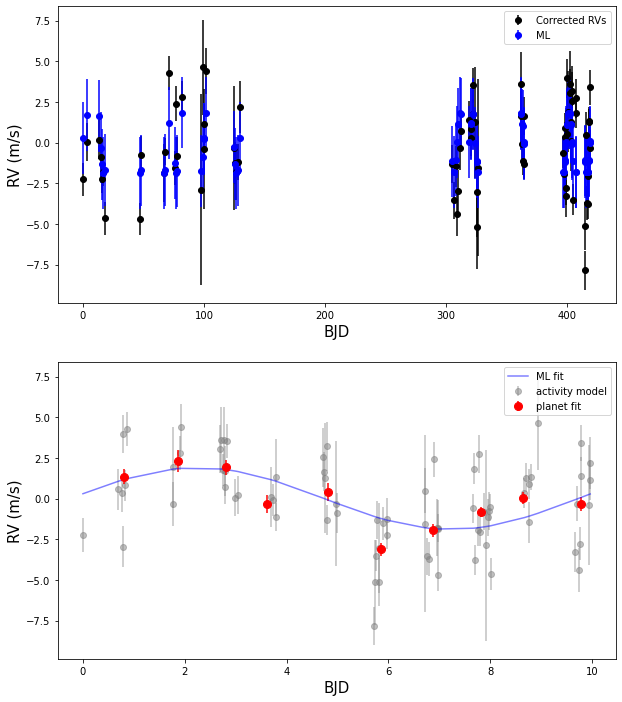

In [27]:
fig, ax = plt.subplots(2,1, figsize=(10, 12))

planet_ml = amp_ml * np.sin(2*np.pi*(time_np-T_c)/period + np.pi)+ D_ml

phase = (time_np)%period
df_rv_ml= pd.DataFrame(list(zip(phase,planet_ml)), 
               columns =['phases',"planet",]) 
df_rv_ml_sorted = df_rv.sort_values(by=['phases'])

#ax[0].scatter(txt_file["BJD_UTC"]-2400000, txt_file["vrad"]-np.mean(txt_file["vrad"]))
ax[0].errorbar(X, Y, yerr = yerr, fmt = 'o', color='k', label="Corrected RVs")
ax[0].errorbar(X, amp_ml * np.sin(2*np.pi*(X-T_c)/period + np.pi)+ D_ml , yerr = jitterpar_ml, fmt = 'o', color='b', label="ML")
ax[0].set_xlabel("BJD", size=15)
ax[0].set_ylabel("RV (m/s)",size=15)
ax[0].legend()

ax[1].errorbar(phase, Y, yerr = yerr, fmt = 'o', color='grey', alpha=0.5, label="activity model", zorder=1)
#plt.errorbar(binned_phases, binned_uncorr_RVs, yerr = binned_uncertainties, fmt = 'o', color='b', alpha=1, markersize = 8, label="planet fit", zorder=1)
ax[1].errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, fmt = 'o', color='r', alpha=1, markersize = 8, label="planet fit", zorder=2)
ax[1].plot(df_rv_ml_sorted["phases"], df_rv_ml_sorted["planet"], color='b',zorder=2, alpha=0.5, label="ML fit")
ax[1].set_xlabel("BJD", size=15)
ax[1].set_ylabel("RV (m/s)",size=15)
ax[1].legend()

## Marginalization & uncertainty estimation

In [28]:
def log_prior(theta):
    amplitude, jitterpar, D = theta
    if -5 < amplitude < 10.0 and 0.01 < jitterpar < 4.0 and -5 < D < 5:
        return 0.0
    return -np.inf

In [29]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [30]:
pos = soln.x + 1e-4 * np.random.randn(32, 3) #ball size array for each parameter
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(X, Y, yerr))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:09<00:00, 530.53it/s]


State([[ 2.41701198  2.25374855  0.08561173]
 [ 2.33040938  1.84945952 -0.05024736]
 [ 1.9796221   2.24818213 -0.27877096]
 [ 1.93920349  2.28890579  0.40535503]
 [ 2.02464181  2.34122195  0.27145289]
 [ 1.73416989  2.44705092 -0.22910907]
 [ 2.35755976  2.51312726 -0.1441166 ]
 [ 1.75479362  2.75716776 -0.13285423]
 [ 1.77615549  1.95664727 -0.00574154]
 [ 2.26293848  2.44343794  0.0398043 ]
 [ 1.26782493  2.08825999 -0.00305119]
 [ 1.61027728  2.02580456 -0.45372714]
 [ 1.64874864  2.42086729 -0.16346132]
 [ 1.9374117   2.06687039 -0.35516677]
 [ 1.93014929  2.00452401 -0.10180091]
 [ 1.77551465  2.0399304   0.13784256]
 [ 1.63401596  2.16589352 -0.30808144]
 [ 2.1753165   2.14844315 -0.03242154]
 [ 2.85394078  2.48200328 -0.04628319]
 [ 1.27975925  2.31516403 -0.13743428]
 [ 1.7118658   2.27813929 -0.26508922]
 [ 1.4884176   2.44281872 -0.01095121]
 [ 1.21797056  1.96860843  0.14959704]
 [ 2.0098817   2.75072887  0.21218214]
 [ 2.37752756  2.38159871 -0.01820699]
 [ 2.05146003  2.26

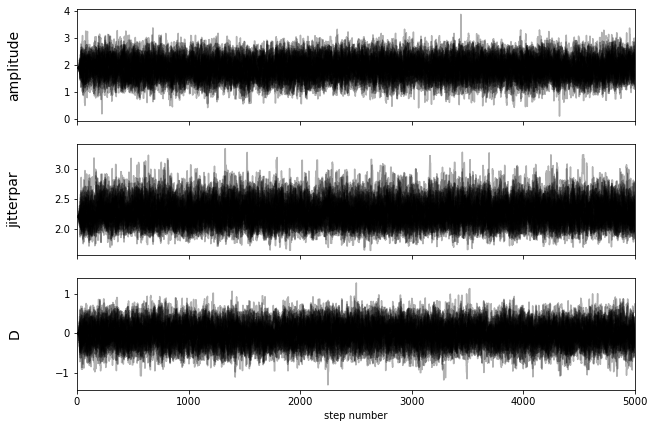

In [31]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["amplitude", "jitterpar", "D"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], size=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [32]:
tau = sampler.get_autocorr_time()
print(tau)

[39.57296105 38.03463619 41.52791764]


In [33]:
# discard first 100 burn-in samples
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


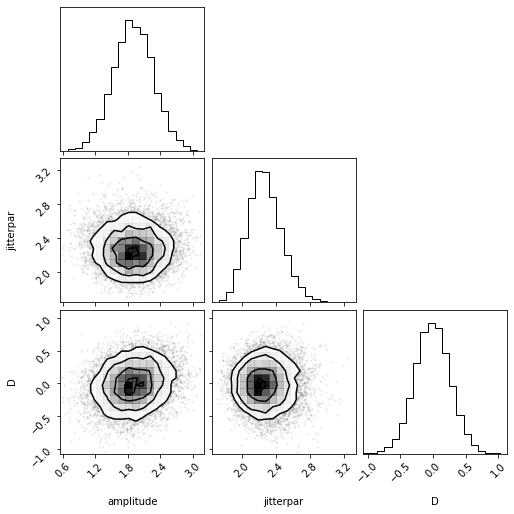

In [34]:
import corner

fig = corner.corner(
    flat_samples, labels=labels)#, truths=[amplitude_true, jitterpar_true, D_true]
#);

In [35]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
amp_mcmc = np.percentile(flat_samples[:, 0], [50])[0]
jitterpar_mcmc = np.percentile(flat_samples[:, 1], [50])[0]
D_mcmc = np.percentile(flat_samples[:, 2], [50])[0]

In [37]:
amp_mcmc

1.8990989354009011

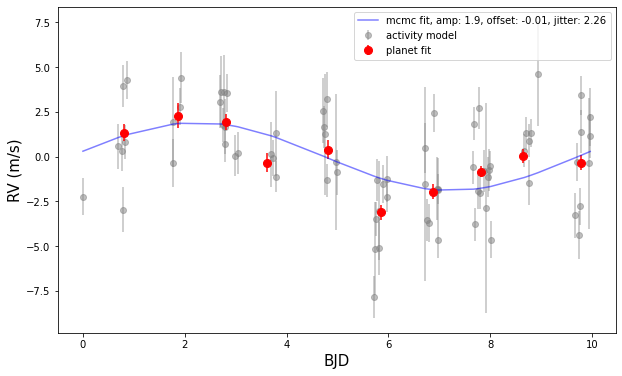

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))

planet_mcmc = amp_mcmc * np.sin(2*np.pi*(x-T_c)/period + np.pi)+ D_mcmc

phase = (time_np)%period
df_rv_mcmc= pd.DataFrame(list(zip(phase,planet_mcmc)), 
               columns =['phases',"planet",]) 
df_rv_mcmc_sorted = df_rv.sort_values(by=['phases'])

#ax[0].scatter(txt_file["BJD_UTC"]-2400000, txt_file["vrad"]-np.mean(txt_file["vrad"]))
#ax[0].errorbar(X, Y, yerr = yerr, fmt = 'o', color='k', label="Corrected RVs")
#ax[0].errorbar(X, amp_ml * np.sin(2*np.pi*(X-T_c)/period + np.pi)+ D_ml , yerr = jitterpar_ml, fmt = 'o', color='b', label="ML")
#ax[0].set_xlabel("BJD", size=15)
#ax[0].set_ylabel("RV (m/s)",size=15)
#ax[0].legend()

ax.errorbar(phase, Y, yerr = yerr, fmt = 'o', color='grey', alpha=0.5, label="activity model", zorder=1)
#plt.errorbar(binned_phases, binned_uncorr_RVs, yerr = binned_uncertainties, fmt = 'o', color='b', alpha=1, markersize = 8, label="planet fit", zorder=1)
ax.errorbar(binned_phases, binned_RVs, yerr = binned_uncertainties, fmt = 'o', color='r', alpha=1, markersize = 8, label="planet fit", zorder=2)
ax.plot(df_rv_mcmc_sorted["phases"], df_rv_mcmc_sorted["planet"], color='b',zorder=2, alpha=0.5, 
        label="mcmc fit, amp: "+str(round(amp_mcmc,2))+", offset: "+str(round(D_mcmc,2))+", jitter: "+str(round(jitterpar_mcmc, 2)))
ax.set_xlabel("BJD", size=15)
ax.set_ylabel("RV (m/s)",size=15)
ax.legend()

## OG code below

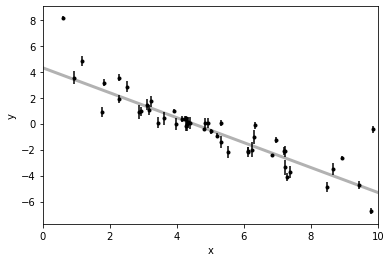

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

Least-squares estimates:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


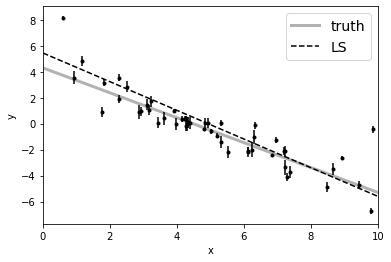

In [29]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

## Maximum Likelihood Estimation

In [4]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


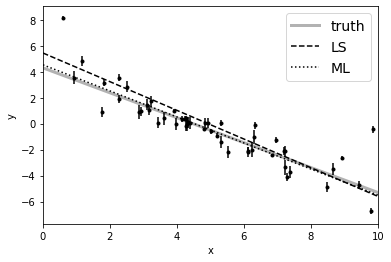

In [5]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

## Marginalization & uncertainty estimation

In [6]:
def log_prior(theta):
    m, b, log_f = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf

In [7]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [10]:
pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True)

100%|██████████| 5000/5000 [00:07<00:00, 711.07it/s]


State([[-0.88571848  3.95740876 -0.50540213]
 [-0.9037139   4.13431481 -0.80470882]
 [-1.08069013  4.98628528 -0.91239079]
 [-1.06222588  4.77580239 -0.8907475 ]
 [-0.99343356  4.48258295 -0.89091486]
 [-0.93466916  4.17088183 -0.77864309]
 [-1.05808575  4.87948984 -0.94613664]
 [-0.92724825  4.17843572 -0.9183769 ]
 [-0.91279691  4.16970657 -0.76628316]
 [-1.12961147  5.08044704 -0.78035558]
 [-1.1922565   5.38875737 -0.92307747]
 [-1.07538085  4.96295956 -0.77902889]
 [-1.01349616  4.56962595 -0.77069875]
 [-1.01923275  4.62677678 -0.61840349]
 [-0.95259424  4.2960795  -0.71487166]
 [-1.01908761  4.56338609 -0.91284513]
 [-0.97027519  4.44386577 -0.53724676]
 [-1.09463631  4.86237864 -0.6865073 ]
 [-1.17946122  5.36909913 -0.99798149]
 [-0.97053285  4.33298227 -0.8096156 ]
 [-0.94486182  4.19638017 -0.63239056]
 [-0.99713532  4.44059124 -0.71055864]
 [-0.84455944  3.81362445 -0.53933767]
 [-0.91475479  4.09500536 -0.69099648]
 [-1.04132123  4.72112854 -0.6673316 ]
 [-1.04288268  4.72

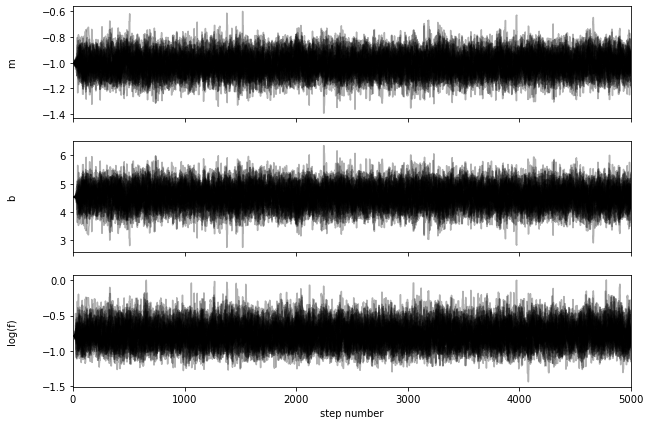

In [11]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [12]:
tau = sampler.get_autocorr_time()
print(tau)

[35.73919335 35.69339914 36.05722561]


In [13]:
# discard first 100 burn-in samples
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


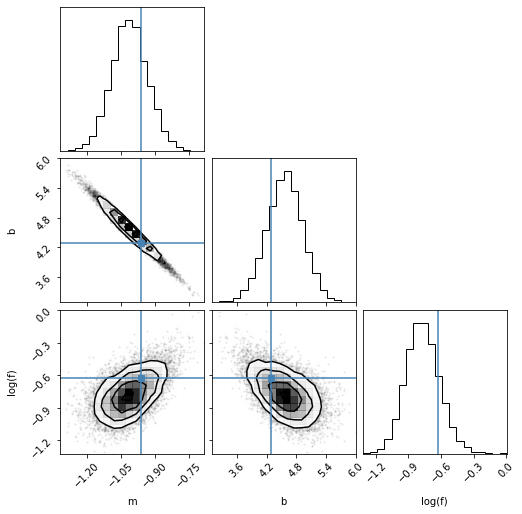

In [14]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
);

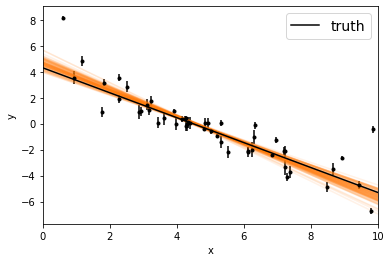

In [15]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [16]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>